In [ ]:
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from geopy.distance import geodesic

bounding_box = [(24.619220023961386, 79.94468841841837),
                      (24.61649485328929, 79.94271953513679),
                      (24.614575904458537, 79.94339881414824),
                      (24.61228241126299, 79.94639200718441),
                      (24.610298657532, 79.95027566620982),
                      (24.60881443524366, 79.95088874297181),
                      (24.60726019913875, 79.95293412913196),
                      (24.606572658511087, 79.9582553604233),
                      (24.60669667877494, 79.95825536527397),
                      (24.607002731909347, 79.96187451577414),
                      (24.608426693570497, 79.96856557561885),
                      (24.61152732237915, 79.97171057257866),
                      (24.613574343971173, 79.97437766514028),
                      (24.615808527401757, 79.97690490392651),
                      (24.61965787171238, 79.97889752020046),
                      (24.62214006002244, 79.97724776443728),
                      (24.623511930413187, 79.97529033761457),
                      (24.62463679368871, 79.97230075751973),
                      (24.6240094687391, 79.96900155936194),
                      (24.62239368365942, 79.96845269828208),
                      (24.621646261181464, 79.96584836365336),
                      (24.621643906484902, 79.96188020626808),
                      (24.622447822744178, 79.95914497845294),
                      (24.622509947771366, 79.95914515096338),
                      (24.621203988647977, 79.95225248718403),
                      (24.62052173681583, 79.94816292431844),
                      (24.619220023961386, 79.94468841841837)]
#create pandas dataframe
df=pd.DataFrame(bounding_box, columns=["latitude", "longitude"])
df.head(30)

,latitude,longitude
0,24.619220,79.944688
1,24.616495,79.942720
2,24.614576,79.943399
3,24.612282,79.946392
4,24.610299,79.950276
5,24.608814,79.950889
6,24.607260,79.952934
7,24.606573,79.958255
8,24.606697,79.958255
9,24.607003,79.961875


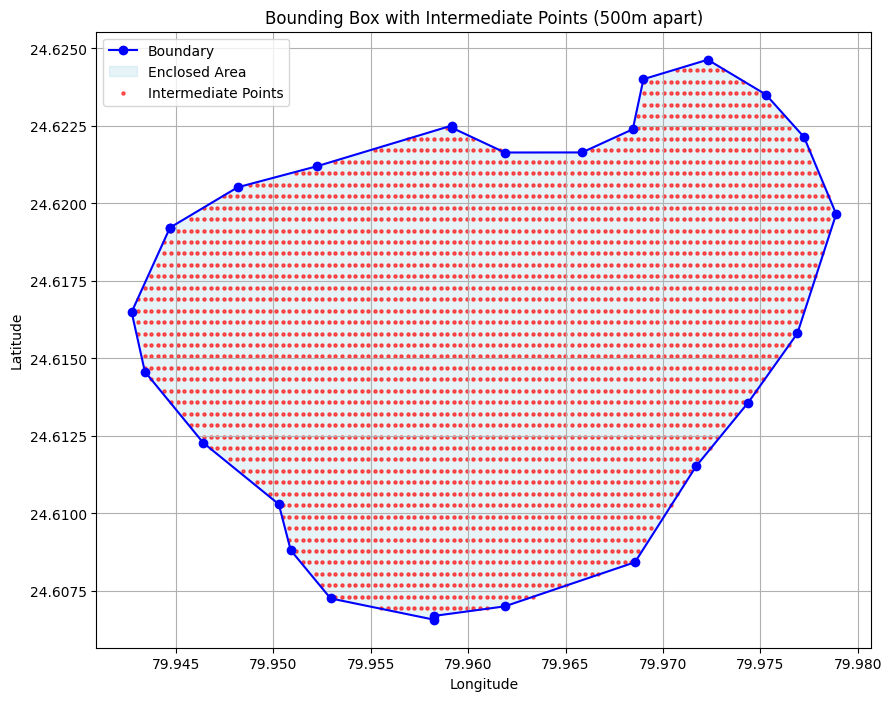

       latitude  longitude
0     24.606942  79.955547
1     24.606942  79.955884
2     24.606942  79.956222
3     24.606942  79.956560
4     24.606942  79.956897
...         ...        ...
3363  24.624295  79.971746
3364  24.624295  79.972083
3365  24.624295  79.972421
3366  24.624295  79.972758
3367  24.624295  79.973096

[3368 rows x 2 columns]


In [ ]:
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Define the bounding box coordinates


bounding_box = [(24.619220023961386, 79.94468841841837),
                      (24.61649485328929, 79.94271953513679),
                      (24.614575904458537, 79.94339881414824),
                      (24.61228241126299, 79.94639200718441),
                      (24.610298657532, 79.95027566620982),
                      (24.60881443524366, 79.95088874297181),
                      (24.60726019913875, 79.95293412913196),
                      (24.606572658511087, 79.9582553604233),
                      (24.60669667877494, 79.95825536527397),
                      (24.607002731909347, 79.96187451577414),
                      (24.608426693570497, 79.96856557561885),
                      (24.61152732237915, 79.97171057257866),
                      (24.613574343971173, 79.97437766514028),
                      (24.615808527401757, 79.97690490392651),
                      (24.61965787171238, 79.97889752020046),
                      (24.62214006002244, 79.97724776443728),
                      (24.623511930413187, 79.97529033761457),
                      (24.62463679368871, 79.97230075751973),
                      (24.6240094687391, 79.96900155936194),
                      (24.62239368365942, 79.96845269828208),
                      (24.621646261181464, 79.96584836365336),
                      (24.621643906484902, 79.96188020626808),
                      (24.622447822744178, 79.95914497845294),
                      (24.622509947771366, 79.95914515096338),
                      (24.621203988647977, 79.95225248718403),
                      (24.62052173681583, 79.94816292431844),
                      (24.619220023961386, 79.94468841841837)]

# Define the polygon
polygon = Polygon(bounding_box)

# Define a function to generate points 500 meters apart
def generate_points_within_polygon(polygon, spacing_km):
    points = []
    min_lat, min_lon, max_lat, max_lon = polygon.bounds
    lat = min_lat
    while lat <= max_lat:
        lon = min_lon
        while lon <= max_lon:
            point = (lat, lon)
            if polygon.contains(Point(point)):
                points.append(point)
            lon += geodesic((lat, lon), (lat, lon + 0.01)).meters / 1000 / spacing_km * 0.01
        lat += geodesic((lat, min_lon), (lat + 0.01, min_lon)).meters / 1000 / spacing_km * 0.01
    return points

# Generate intermediate points
intermediate_points = generate_points_within_polygon(polygon, spacing_km=30)

# Plot the bounding box and the intermediate points
plt.figure(figsize=(10, 8))
# Plot the bounding box
lats, lons = zip(*bounding_box)
plt.plot(lons, lats, marker='o', linestyle='-', color='blue', label='Boundary')
plt.fill(lons, lats, color='lightblue', alpha=0.3, label='Enclosed Area')
# Plot the intermediate points
intermediate_lats, intermediate_lons = zip(*intermediate_points)
plt.scatter(intermediate_lons, intermediate_lats, color='red', s=5, label='Intermediate Points', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bounding Box with Intermediate Points (500m apart)')
plt.legend()
plt.grid()
plt.show()

# Prepare the points as a DataFrame
intermediate_points_df = pd.DataFrame(intermediate_points, columns=["latitude", "longitude"])
print(intermediate_points_df)


In [ ]:
intermediate_points_df.to_csv("yellow_bounding_box.csv", index=False)

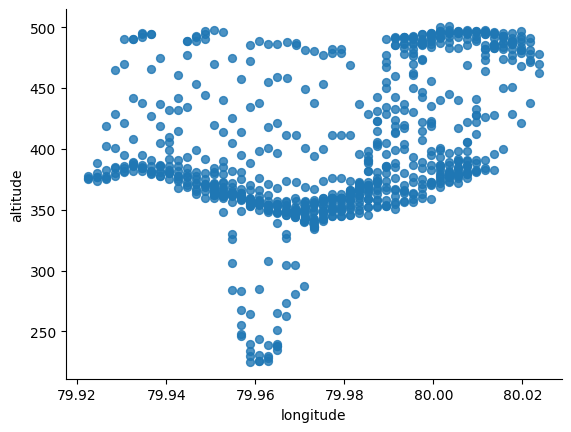

In [ ]:
# @title longitude vs altitude

from matplotlib import pyplot as plt
intermediate_points_df.plot(kind='scatter', x='longitude', y='altitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

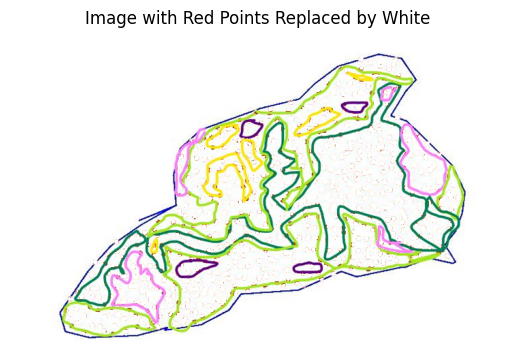

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "/content/b_r_p.png"
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for red color in HSV
lower_red1 = np.array([0, 50, 50])   # Lower range for red
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50]) # Upper range for red
upper_red2 = np.array([180, 255, 255])

# Create masks for red
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

# Replace the red points with white
image[mask > 0] = [255, 255, 255]

# Save and display the result
output_path = "cleaned_image_white.png"
cv2.imwrite(output_path, image)

# Display using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Image with Red Points Replaced by White")
plt.show()


In [ ]:
from shapely.geometry import Point, Polygon
import pandas as pd

# Inner boundaries and their classifications
inner_boundaries = [
    {"polygon": Polygon([(24.618417079468372, 79.95798781044246),(24.61742411725427, 79.95825668990645),
                                          (24.616246007830675, 79.95805053104259),
                                          (24.61475791417041, 79.9575051300168),(24.614696705532953, 79.95545739146894),
                                          (24.61500588893887, 79.95286771107386),(24.61469676460098, 79.95095753704952),
                                          (24.61308467191275, 79.95170769841403),(24.612899777618544, 79.95334332994601),
                                          (24.612961686535648, 79.95552476027646),(24.6135178125146, 79.95730052253892),
                                          (24.612958350002163, 79.95887206320937),(24.611966737421987, 79.96003006912929),
                                          (24.613205714345046, 79.96044300783677),(24.613516410100043, 79.96160103793713),
                                          (24.613328717199867, 79.96338026353132),(24.612398346884845, 79.96324257184675),
                                          (24.610969632081506, 79.96351909736302),(24.61078226321344, 79.96434079961763),
                                          (24.611959745388805, 79.96475612450662),(24.613449884212375, 79.96516678925073),
                                          (24.61332551164171, 79.96666958747936),(24.612704613909806, 79.96782972292328),
                                          (24.61264165592751, 79.97001812833767),(24.61394550949287, 79.97145406978733),
                                          (24.615808405529684, 79.97255164372366),(24.616677876216045, 79.97351486907746),
                                          (24.618169303213968, 79.97255793423875),(24.617858750455834, 79.97002418305723),
                                          (24.61928704926025, 79.97063577822696),(24.620032878765155, 79.97166519239157),
                                          (24.622209859674655, 79.9731131229687),(24.622454678387136, 79.97104639033851),
                                          (24.62096437308087, 79.97009077299826),(24.619535700296687, 79.96872254072002),
                                          (24.61910002835985, 79.96768937680972),(24.618913181512116, 79.96542929898769),
                                          (24.618912698310957, 79.96324047854522),(24.61717578437129, 79.96289713072751),
                                          (24.61562578155107, 79.96159671412529),(24.61543990517471, 79.960573357004),
                                          (24.61723808725748, 79.9599654802701),(24.619782084195375, 79.95908018403668),
                                          (24.618417079468372, 79.95798781044246)]), "type": "Northern mixed dry deciduous forest"},
    {"polygon": Polygon([(24.612282521722864, 79.94632396546983),(24.614883053980265, 79.94788978214841),
                                           (24.61736155303235, 79.94782414835498),(24.619655494995463, 79.95061663770908),
                                           (24.621265739822782, 79.95211605835767),(24.62052194578654, 79.94809465167943),
                                           (24.61921999799077, 79.94475662201907),
                                           (24.616494856125442, 79.94265157017125),(24.614575904458537, 79.94339881414824),(24.612282521722864, 79.94632396546983)]), "type": "Northern mixed dry deciduous forest"},
    {"polygon": Polygon([(24.621203842099114, 79.95218425150095),(24.61965542198229, 79.95054844530598),
           (24.617299657883645, 79.94782408462297),(24.614821050076024, 79.94788975195976),
           (24.61469676460098, 79.95095753704952),(24.614943878611435, 79.95286770980353),
           (24.61463476908784, 79.95538910511891),(24.61481989803299, 79.95750520385036),
       (24.616184006246776, 79.95805052736122),(24.617362088143725, 79.95832466193274),
       (24.618417079468372, 79.95798781044246),(24.621203842099114, 79.95218425150095)
       ]), "type": "Mixed dry deciduous forest with bamboo"},
    {"polygon": Polygon([(24.614883053980265, 79.94788978214841),(24.612344562145235, 79.94639217473151),
      (24.61017499559828, 79.95013936775565),(24.608628618896944, 79.950820617316),
      (24.607260630382036, 79.95279768141447),(24.61302275260125, 79.9517076681399),
      (24.61469672945946, 79.95102573162936),(24.614883053980265, 79.94788978214841)
      ]), "type": "Southern tropical dry deciduous teak forest"},
    {"polygon": Polygon([(24.60732226358521, 79.95286594036867),(24.612713850134476, 79.95334332548157),
       (24.61308467191275, 79.95170769841403)]), "type": "Mixed dry deciduous forest with bamboo"},
    {"polygon": Polygon([(24.607260419532132, 79.95286590242046),(24.606758688869416, 79.95825536769982),
      (24.607002674374026, 79.96180636199284),(24.60836456545249, 79.96856574134728),
      (24.611589410917315, 79.97177869854889),(24.613698490363703, 79.97437768744398),
      (24.61580857705941, 79.97676773843858),(24.61661572756599, 79.97358325167095),
      (24.61574632876914, 79.97248267044631),(24.613945555955183, 79.97152198415897),
      (24.61270375578348, 79.9700864336761),(24.612704495033825, 79.96789849150325),
      (24.613263348292918, 79.96660158920399),(24.613449884212375, 79.96516678925073),
      (24.612021842767245, 79.96475613139786),(24.610906411033973, 79.96434081300161),
      (24.610969400481107, 79.96338311086693),(24.61246012436958, 79.96337982884245),
      (24.613328717199867, 79.96338026353132),(24.61364027789026, 79.9616016860183),
      (24.613329684553467, 79.96051153470619),(24.61196673200461, 79.9600982827545),
      (24.612958350002163, 79.95887206320937),(24.613517697634133, 79.95743715733985),
      (24.613023664995094, 79.95545659301173),(24.612837804941353, 79.95320698946405),
      (24.607260419532132, 79.95286590242046)]), "type": "Southern tropical dry deciduous teak forest"},
    {"polygon": Polygon([(24.61580854150326, 79.976836576016),(24.619843918852638, 79.9788950851208),
       (24.622140457129376, 79.97718147921937),(24.623513716865066, 79.97509194525958),
       (24.622209859674655, 79.9731131229687),(24.6200950443431, 79.97173389215729),
       (24.619349145496624, 79.97063566606506),(24.617920862423052, 79.97016102613277),
       (24.61816931284796, 79.97262664236064),(24.616553595263007, 79.97358291075287),
       (24.61580854150326, 79.976836576016)]), "type": "Mixed dry deciduous forest with bamboo"},
    {"polygon": Polygon([(24.623512525820836, 79.97522421856658),(24.62463679368871, 79.97230075751973),
      (24.624133678338755, 79.96900146486215),(24.622517925186102, 79.96845272147458),
      (24.621584046088604, 79.96577961202294),(24.62158194518423, 79.96188043521298),
      (24.62257207511831, 79.95914532347805),(24.622756701146628, 79.95689203613284),
      (24.621203842099114, 79.95218425150095),(24.61841710216739, 79.95791966332416),
      (24.61990609198727, 79.95914820088615),(24.61723808725748, 79.9599654802701),
      (24.615501938816678, 79.96064126570452),(24.61562578155107, 79.96159671412529),
      (24.617113761697762, 79.96282850250655),(24.618912698310957, 79.96324047854522),
      (24.61897523526878, 79.9654293061008),(24.619100088825277, 79.96775821995715),
      (24.619535774054988, 79.96879144922023),(24.620902368862982, 79.97009131803797),
      (24.622579123457676, 79.97111559719735),(24.622209859674655, 79.9731131229687),
      (24.62003285021468, 79.97159659189016),(24.619162854570725, 79.97063600255227),
      (24.617920857688777, 79.97009241582825),(24.618169322451124, 79.97269535267645),
      (24.616615758716147, 79.97344580883015),(24.623512525820836, 79.97522421856658)
      ]), "type": "Southern tropical dry deciduous teak forest"},
    {"polygon": Polygon([(24.621338698953622, 79.97570802660002),(24.619163638647304, 79.97523013838052),
      (24.6174852486879, 79.97542394573331),(24.615746487415223, 79.97683611021225),
      (24.619905663326765, 79.97902856406425),(24.622140457129376, 79.97718147921937),
      (24.621338698953622, 79.97570802660002)]), "type": "Southern tropical dry deciduous teak forest"},
    {"polygon": Polygon([(24.61841710216739, 79.95791966332416),(24.621329321916523, 79.95586718660138),
      (24.621394384682397, 79.96057996040095),(24.620651426926855, 79.96235933831194),
      (24.61885066606407, 79.96324047241393),(24.617113761825983, 79.962965751327),
      (24.61556373474187, 79.9615970947977),(24.61562600566599, 79.96064068708813),
      (24.617238087603383, 79.96003387038343),(24.61990609198727, 79.95914820088615),
      (24.61841710216739, 79.95791966332416)]), "type": "Grassland savannah"},
    {"polygon": Polygon([(24.620713384237547, 79.96502232554921),(24.621210926583355, 79.9673487301845),
      (24.620902361207424, 79.97015965354254),(24.619597885691718, 79.96879145795992),
      (24.61910002835985, 79.96768937680972),(24.61897523526878, 79.9654293061008),
      (24.620713384237547, 79.96502232554921)]), "type": "Grassland savannah"},
    {"polygon": Polygon([(24.611474281656584, 79.9550475175326),(24.611223574145882, 79.95750506991165),
      (24.611904717199067, 79.96009827812475),(24.61308213722303, 79.95880445053056),
      (24.6137038264385, 79.95730053253172),(24.612961689102733, 79.95545659054231),
      (24.612775827558504, 79.95327515750125),(24.611474281656584, 79.9550475175326)
      ]), "type": "Boswellia Forest"},
    {"polygon": Polygon([(24.61028546537648, 79.96577469220736),(24.609975537420933, 79.96297498951013),
      (24.608736612910324, 79.9626979221181),(24.60848558262109, 79.9644087209513),
      (24.608736195779304, 79.96624723784099),(24.609728939686352, 79.9673394477109),
      (24.61028546537648, 79.96577469220736)]), "type": "Boswellia Forest"}
]

# Add a "forest_type" column to the intermediate points DataFrame
def classify_point(point):
    for boundary in inner_boundaries:
        if boundary["polygon"].contains(Point(point)):
            return boundary["type"]
    return "Unclassified"  # Default if no inner boundary contains the point

# Apply classification to each point
intermediate_points_df["forest_type"] = intermediate_points_df.apply(
    lambda row: classify_point((row["latitude"], row["longitude"])),
    axis=1
)

# View the updated DataFrame
print(intermediate_points_df)
print(intermediate_points_df["forest_type"].unique())
# intermediate_points_df.to_csv("classified_points.csv", index=False)


       latitude  longitude                                  forest_type
0     24.606942  79.955547                                 Unclassified
1     24.606942  79.955884                                 Unclassified
2     24.606942  79.956222                                 Unclassified
3     24.606942  79.956560  Southern tropical dry deciduous teak forest
4     24.606942  79.956897  Southern tropical dry deciduous teak forest
...         ...        ...                                          ...
3363  24.624295  79.971746  Southern tropical dry deciduous teak forest
3364  24.624295  79.972083  Southern tropical dry deciduous teak forest
3365  24.624295  79.972421  Southern tropical dry deciduous teak forest
3366  24.624295  79.972758  Southern tropical dry deciduous teak forest
3367  24.624295  79.973096  Southern tropical dry deciduous teak forest

[3368 rows x 3 columns]
['Unclassified' 'Southern tropical dry deciduous teak forest'
 'Mixed dry deciduous forest with bamboo'
 'North

In [ ]:
print(intermediate_points_df["forest_type"].unique())

['Unclassified' 'Southern tropical dry deciduous teak forest'
 'Mixed dry deciduous forest with bamboo'
 'Northern mixed dry deciduous forest' 'Grassland savannah']


In [ ]:
from shapely.geometry import Point, Polygon
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import Polygon
import pandas as pd
import numpy as np


# Inner boundaries and their classifications
inner_boundaries = [
    {"polygon": Polygon([(24.621338698953622, 79.97570802660002),(24.619163638647304, 79.97523013838052),
      (24.6174852486879, 79.97542394573331),(24.615746487415223, 79.97683611021225),
      (24.619905663326765, 79.97902856406425),(24.622140457129376, 79.97718147921937),
      (24.621338698953622, 79.97570802660002)]), "type": "Southern tropical dry deciduous teak forest"},
    {"polygon": Polygon([(24.61841710216739, 79.95791966332416),(24.621329321916523, 79.95586718660138),
      (24.621394384682397, 79.96057996040095),(24.620651426926855, 79.96235933831194),
      (24.61885066606407, 79.96324047241393),(24.617113761825983, 79.962965751327),
      (24.61556373474187, 79.9615970947977),(24.61562600566599, 79.96064068708813),
      (24.617238087603383, 79.96003387038343),(24.61990609198727, 79.95914820088615),
      (24.61841710216739, 79.95791966332416)]), "type": "Grassland savannah"},
    {"polygon": Polygon([(24.620713384237547, 79.96502232554921),(24.621210926583355, 79.9673487301845),
      (24.620902361207424, 79.97015965354254),(24.619597885691718, 79.96879145795992),
      (24.61910002835985, 79.96768937680972),(24.61897523526878, 79.9654293061008),
      (24.620713384237547, 79.96502232554921)]), "type": "Grassland savannah"},
    {"polygon": Polygon([(24.611474281656584, 79.9550475175326),(24.611223574145882, 79.95750506991165),
      (24.611904717199067, 79.96009827812475),(24.61308213722303, 79.95880445053056),
      (24.6137038264385, 79.95730053253172),(24.612961689102733, 79.95545659054231),
      (24.612775827558504, 79.95327515750125),(24.611474281656584, 79.9550475175326)
      ]), "type": "Boswellia Forest"},
    {"polygon": Polygon([(24.61028546537648, 79.96577469220736),(24.609975537420933, 79.96297498951013),
      (24.608736612910324, 79.9626979221181),(24.60848558262109, 79.9644087209513),
      (24.608736195779304, 79.96624723784099),(24.609728939686352, 79.9673394477109),
      (24.61028546537648, 79.96577469220736)]), "type": "Boswellia Forest"}
]

# Add a "forest_type" column to the intermediate points DataFrame
def classify_point(row):
    for boundary in inner_boundaries:
        if boundary["polygon"].contains(Point(row["latitude"], row["longitude"])):
            return boundary["type"]
    # Retain the existing forest type if no boundary contains the point
    return row["forest_type"] if "forest_type" in row and pd.notnull(row["forest_type"]) else "Unclassified"

# Apply classification to each point
intermediate_points_df["forest_type"] = intermediate_points_df.apply(
    classify_point,
    axis=1
)

# View the updated DataFrame
print(intermediate_points_df)
print(intermediate_points_df["forest_type"].unique())
# intermediate_points_df = intermediate_points_df[intermediate_points_df["forest_type"] != "Unclassified"]
# intermediate_points_df.to_csv("classified_points.csv", index=False)

       latitude  longitude                                  forest_type
0     24.606942  79.955547                                 Unclassified
1     24.606942  79.955884                                 Unclassified
2     24.606942  79.956222                                 Unclassified
3     24.606942  79.956560  Southern tropical dry deciduous teak forest
4     24.606942  79.956897  Southern tropical dry deciduous teak forest
...         ...        ...                                          ...
3363  24.624295  79.971746  Southern tropical dry deciduous teak forest
3364  24.624295  79.972083  Southern tropical dry deciduous teak forest
3365  24.624295  79.972421  Southern tropical dry deciduous teak forest
3366  24.624295  79.972758  Southern tropical dry deciduous teak forest
3367  24.624295  79.973096  Southern tropical dry deciduous teak forest

[3368 rows x 3 columns]
['Unclassified' 'Southern tropical dry deciduous teak forest'
 'Mixed dry deciduous forest with bamboo' 'Boswel

In [ ]:
intermediate_points_df.to_csv("classified_points.csv", index=False)

In [ ]:
import pandas as pd


file_path = '/content/classified_points.csv'
data = pd.read_csv(file_path)
data.head()


,latitude,longitude,forest_type
0,24.606942,79.955547,Unclassified
1,24.606942,79.955884,Unclassified
2,24.606942,79.956222,Unclassified
3,24.606942,79.956560,Southern tropical dry deciduous teak forest
4,24.606942,79.956897,Southern tropical dry deciduous teak forest


<ipython-input-59-50c278c8d478>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_classes))


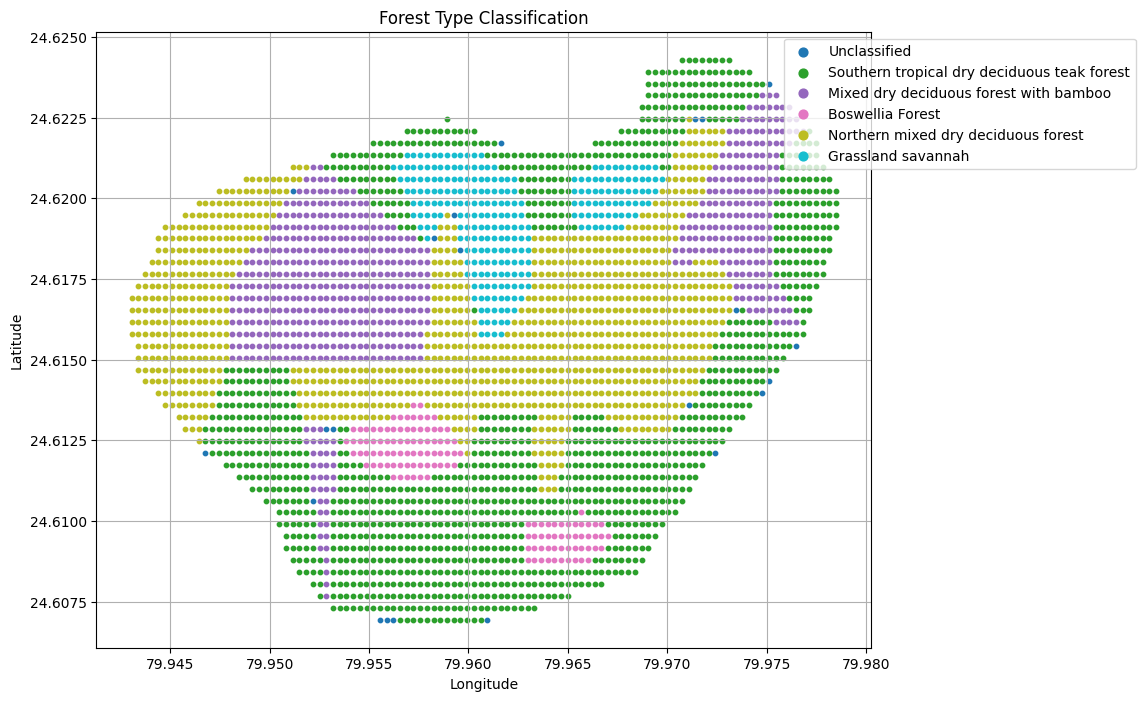

In [ ]:
import matplotlib.pyplot as plt

# Separate the points by their forest type for better visualization
unique_classes = data['forest_type'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_classes))

# Plot each class with a unique color
plt.figure(figsize=(10, 8))
for idx, forest_type in enumerate(unique_classes):
    subset = data[data['forest_type'] == forest_type]
    plt.scatter(subset['longitude'], subset['latitude'],
                label=forest_type, s=10, color=colors(idx))

# Add plot details
plt.title("Forest Type Classification")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(markerscale=2, loc='upper right', bbox_to_anchor=(1.35, 1))
plt.grid()
plt.show()


In [ ]:
#Elevation code
import requests
import pandas as pd
from time import sleep

# Function to get elevation for a single point
def get_elevation(lat, lon):
    url = f"https://api.open-elevation.com/api/v1/lookup?locations={lat},{lon}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            elevation_data = response.json()
            return elevation_data['results'][0]['elevation']
        else:
            print(f"Failed to fetch elevation for ({lat}, {lon}). Status Code: {response.status_code}")
            return None
    except Exception as e:
        print(f"Error fetching elevation for ({lat}, {lon}): {e}")
        return None

# Add altitude column to the DataFrame
def add_elevation_to_df(df):
    altitudes = []
    for _, row in df.iterrows():
        lat, lon = row['latitude'], row['longitude']
        altitude = get_elevation(lat, lon)
        altitudes.append(altitude)
        sleep(0.1)  # Sleep to avoid rate-limiting
    df['altitude'] = altitudes
    return df

# Add the elevation data
intermediate_points_df = add_elevation_to_df(data)
intermediate_points_df

Failed to fetch elevation for (24.607311106101683, 79.95993519299982). Status Code: 504
Failed to fetch elevation for (24.608418777623434, 79.96466086666378). Status Code: 504
Failed to fetch elevation for (24.608788001500248, 79.96061010679281). Status Code: 504
Failed to fetch elevation for (24.609157225395176, 79.95622181373538). Status Code: 504
Failed to fetch elevation for (24.609157225395176, 79.96871142143908). Status Code: 504
Failed to fetch elevation for (24.60952644930822, 79.96331044955942). Status Code: 504
Failed to fetch elevation for (24.60989567323938, 79.95352129460251). Status Code: 504
Failed to fetch elevation for (24.60989567323938, 79.96533571901814). Status Code: 504
Failed to fetch elevation for (24.610264897188653, 79.95689680281917). Status Code: 504
Failed to fetch elevation for (24.610634121156043, 79.96533558624209). Status Code: 504
Failed to fetch elevation for (24.611003345141548, 79.95689671958583). Status Code: 504
Failed to fetch elevation for (24.6

,latitude,longitude,forest_type,altitude
0,24.606942,79.955547,Unclassified,362.0
1,24.606942,79.955884,Unclassified,362.0
2,24.606942,79.956222,Unclassified,362.0
3,24.606942,79.956560,Southern tropical dry deciduous teak forest,361.0
4,24.606942,79.956897,Southern tropical dry deciduous teak forest,361.0
...,...,...,...,...
3363,24.624295,79.971746,Southern tropical dry deciduous teak forest,340.0
3364,24.624295,79.972083,Southern tropical dry deciduous teak forest,340.0
3365,24.624295,79.972421,Southern tropical dry deciduous teak forest,340.0
3366,24.624295,79.972758,Southern tropical dry deciduous teak forest,340.0


In [ ]:
intermediate_points_df.to_csv("classified_points_with_elevation.csv", index=False)

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/classified_points_with_elevation.csv'
data = pd.read_csv(file_path)
data.head()

,latitude,longitude,forest_type,altitude
0,24.606942,79.955547,Water,362.0
1,24.606942,79.955884,Water,362.0
2,24.606942,79.956222,Water,362.0
3,24.606942,79.956560,Water,361.0
4,24.606942,79.956897,Water,361.0


In [ ]:
from shapely.geometry import Point, Polygon
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import Polygon
import pandas as pd
import numpy as np


# Inner boundaries and their classifications
inner_boundaries = [
    {"polygon": Polygon([(24.615625238125393, 79.9629690140119),(24.615225818512158, 79.9625832766049),
       (24.614872708654662, 79.96324509050348),(24.61537331721811, 79.9634991078048),(24.615625238125393, 79.9629690140119)]), "type": "Water"},
    {"polygon": Polygon([(24.615728268373548, 79.96437411007821),(24.614418160721378, 79.96367157542504),
     (24.61416183578659, 79.96383438070828),(24.614907338171673, 79.96442509034502),
     (24.615140081438263, 79.9645874529134),(24.615728268373548, 79.96437411007821)]), "type": "Water"},
    {"polygon": Polygon([(24.619159239639963, 79.96896829626246),(24.619092467121426, 79.9689300496607)
      ,(24.61908245927759, 79.96901206602988),(24.619122711047783, 79.9690287813395)
      ,(24.619147858473163, 79.9689984579105),(24.619159239639963, 79.96896829626246)]), "type": "Water"},
    {"polygon": Polygon([(24.61002462348618, 79.95907351034226),(24.609632746031842, 79.95881543756329),
       (24.609302996360572, 79.95903677491467),(24.609036082394155, 79.95948075058524),
       (24.60955624745668, 79.96008730023213),(24.609948120414124, 79.95994509938723),(24.61002462348618, 79.95907351034226)]), "type": "Water"},
    {"polygon": Polygon([(24.61776758069228, 79.96300631678446), (24.617580212285098, 79.96279553267296),
       (24.61716360508885, 79.9625963733911), (24.61670595831095, 79.96273404153455),
       (24.616884708217277, 79.96318372226338), (24.617222297186977, 79.96328815910805),
       (24.617560065184247, 79.96328765652699), (24.61776758069228, 79.96300631678446)]), "type": "Water"},
    {"polygon": Polygon([(24.621628466382056, 79.96438758764079),(24.621418561163413, 79.96427983057373),
       (24.62118361869142, 79.96407200144365),(24.621009164132207, 79.96384659871094),
       (24.620852384188012, 79.96367252337376),(24.620604848034095, 79.96333584181377),
       (24.620425985389875, 79.96296769610632),(24.620154872725017, 79.96256782673886),
       (24.620167724298074, 79.96246872852892),(24.620043015343324, 79.962271961293),
       (24.62002617039121, 79.96205264028346),(24.62003538571423, 79.96176542376135),
       (24.619990815554697, 79.96184802801527),(24.619954046575202, 79.96203750455918),
       (24.61999014027118, 79.96227196157825),
       (24.620065545023596, 79.96255863791748),(24.62026881157085, 79.9628396472278),
       (24.620390470516597, 79.96304517069461),(24.620389073474186, 79.96304208724881),
       (24.62052446109235, 79.9632902813038),(24.62075269858041, 79.96376321248833),
       (24.620930539852978, 79.96400555817685),(24.621060525280036, 79.96420779056206),
       (24.621338006917846, 79.96451568873019),(24.621513047316895, 79.96483386796108),
       (24.62188398497982, 79.9650030485701),(24.622054523576445, 79.96502587295674),
       (24.62228498441401, 79.9651960422604),(24.622451399766675, 79.96533036831238),
       (24.622556459614508, 79.96546817262177),(24.62266624388133, 79.96532764673188),
       (24.622662805178003, 79.96532759206727),(24.62246570103148, 79.96515574118048),
       (24.62245888354851, 79.96515197672991),(24.6221975278147, 79.964958491945),
       (24.621959086739654, 79.9647596899229),(24.621955683385412, 79.96475594643452),
       (24.62163248604371, 79.96438630472423)]), "type": "Water"},
    {"polygon": Polygon([(24.62206738344075, 79.96367803798259),(24.62185429826701, 79.96346189196349),
       (24.62126936783714, 79.96284240612145),(24.62118363126546, 79.96262301036107),
       (24.621126516817284, 79.96227701317477),(24.62100171881239, 79.96186974561851),
       (24.620863138252904, 79.9615170530154),(24.620724566383444, 79.96117165863102),
       (24.620585926086473, 79.96077196010148),(24.620403676087605, 79.96030730999138),
       (24.620068649347186, 79.95953256765304),(24.619866247504895, 79.9591193174782),
       (24.619737916079753, 79.95890424215776),(24.619358055160983, 79.95842617435386),
       (24.619187068746488, 79.95811726986615),(24.619087378632894, 79.95789240665245),
       (24.61909159717132, 79.9574324866939),(24.61892707819041, 79.95706401157521),
       (24.61871245135474, 79.95671490000942),(24.61844432829786, 79.95666986104239),
       (24.618296385474228, 79.95633446772318),(24.6182915891182, 79.95633709933261),
       (24.61810362748221, 79.95600014019816),(24.617355416529303, 79.95533763681726),
       (24.616937399037138, 79.95522289195074),(24.61663232930514, 79.9550564162628),
       (24.61640147679406, 79.95512953091257),(24.61655829891682, 79.95529391284411),
       (24.616881916748394, 79.95560572033756),(24.617243759316345, 79.95577889667739),
       (24.617771139595437, 79.95608217886367),(24.618047150254416, 79.95605681981192),
       (24.618472166506663, 79.95745127185603),(24.618740577061473, 79.9579725844117),
       (24.61923091909773, 79.95838326070381),(24.61972943765639, 79.95990492113899),
       (24.620146448140872, 79.96104838212642),(24.620720074342668, 79.96233663990968),
       (24.621162813608453, 79.96359859975202),(24.621175808551534, 79.96361415828446),(24.62184940845013, 79.9638816132245),
       (24.62206738344075, 79.96367803798259)]), "type": "Water"}
]

# Add a "forest_type" column to the intermediate points DataFrame
def classify_point(row):
    for boundary in inner_boundaries:
        if boundary["polygon"].contains(Point(row["latitude"], row["longitude"])):
            return boundary["type"]
    # Retain the existing forest type if no boundary contains the point
    return row["forest_type"] if "forest_type" in row and pd.notnull(row["forest_type"]) else "Unclassified"

# Apply classification to each point
data["forest_type"] = data.apply(
    classify_point,
    axis=1
)

# View the updated DataFrame
print(data)
print(data["forest_type"].unique())
# intermediate_points_df = intermediate_points_df[intermediate_points_df["forest_type"] != "Unclassified"]
# intermediate_points_df.to_csv("classified_points.csv", index=False)

       latitude  longitude                                  forest_type  \
0     24.606942  79.955547                                        Water   
1     24.606942  79.955884                                        Water   
2     24.606942  79.956222                                        Water   
3     24.606942  79.956560                                        Water   
4     24.606942  79.956897                                        Water   
...         ...        ...                                          ...   
3363  24.624295  79.971746  Southern tropical dry deciduous teak forest   
3364  24.624295  79.972083  Southern tropical dry deciduous teak forest   
3365  24.624295  79.972421  Southern tropical dry deciduous teak forest   
3366  24.624295  79.972758  Southern tropical dry deciduous teak forest   
3367  24.624295  79.973096  Southern tropical dry deciduous teak forest   

      altitude  
0        362.0  
1        362.0  
2        362.0  
3        361.0  
4        361.0

In [ ]:
# data = data.drop(columns=["forest_type"])
data.to_csv("classified_points_with_elevation_water_c.csv", index=False)

In [ ]:
# Map colors for plotting
colors = {
    "Southern tropical dry deciduous teak forest": "green",
    "Northern mixed dry deciduous forest": "brown",
    "Mixed dry deciduous forest with bamboo": "orange",
    "Grassland savannah": "yellow",
    "Boswellia Forest": "purple",
    "Water": "blue"
}

# Assign color based on forest type and water body presence
data["color"] = data.apply(
    lambda row: "blue" if row["forest_type"] == "Water" else colors.get(row["forest_type"], "gray"),
    axis=1
)

<ipython-input-39-50c278c8d478>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_classes))


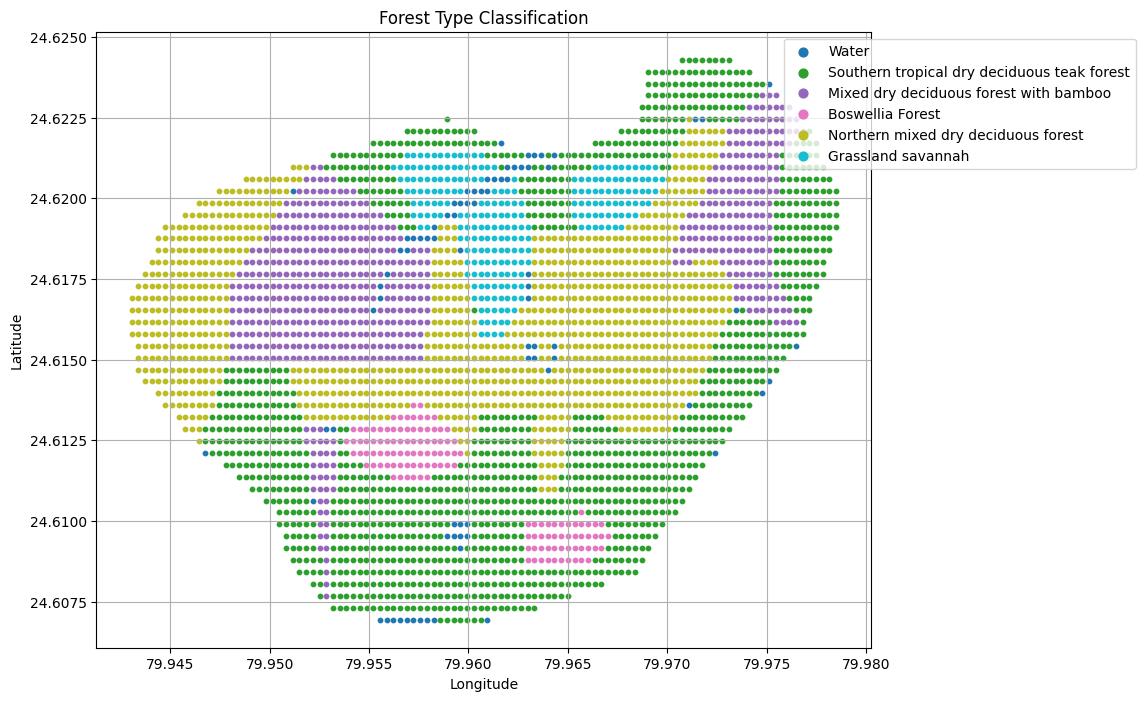

In [ ]:
import matplotlib.pyplot as plt

# Separate the points by their forest type for better visualization
unique_classes = data['forest_type'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_classes))

# Plot each class with a unique color
plt.figure(figsize=(10, 8))
for idx, forest_type in enumerate(unique_classes):
    subset = data[data['forest_type'] == forest_type]
    plt.scatter(subset['longitude'], subset['latitude'],
                label=forest_type, s=10, color=colors(idx))

# Add plot details
plt.title("Forest Type Classification")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(markerscale=2, loc='upper right', bbox_to_anchor=(1.35, 1))
plt.grid()
plt.show()


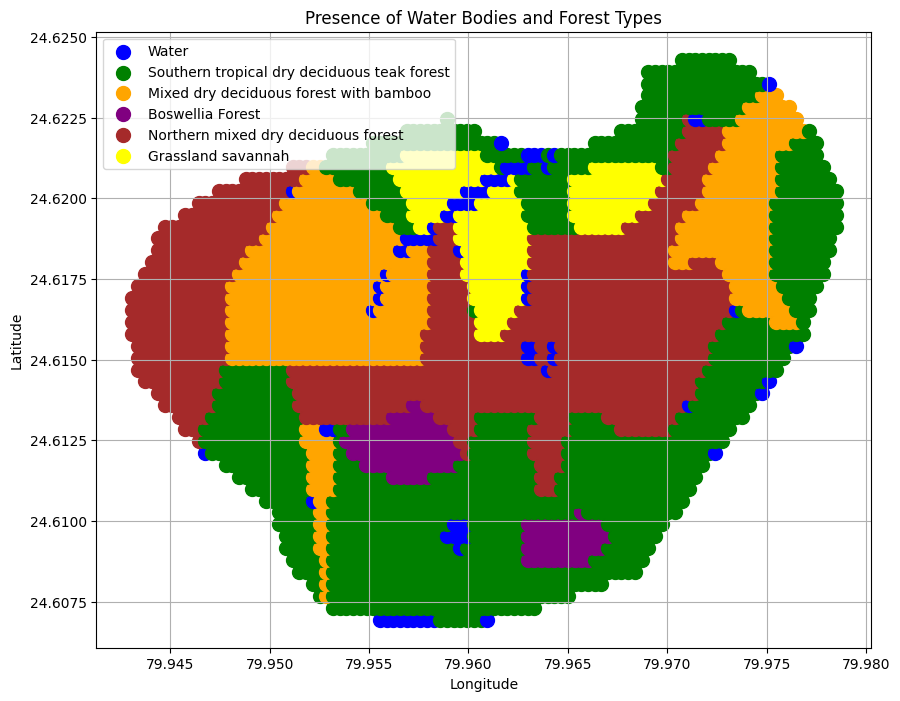

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
for _, row in data.iterrows():
    plt.scatter(row["longitude"], row["latitude"], color=row["color"], s=100, label=row["forest_type"])

# Avoid duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Presence of Water Bodies and Forest Types")
plt.grid(True)
plt.show()

In [ ]:
data.head()

,latitude,longitude,forest_type,altitude,color
0,24.606942,79.955547,Water,362.0,blue
1,24.606942,79.955884,Water,362.0,blue
2,24.606942,79.956222,Water,362.0,blue
3,24.606942,79.956560,Water,361.0,blue
4,24.606942,79.956897,Water,361.0,blue


In [ ]:
import pandas as pd

# Load the uploaded CSV file to inspect its structure
file_path = '/content/classified_points_with_elevation_water_c.csv'
data = pd.read_csv(file_path)
# Display the first few rows to understand the dataset
data.head()

,Grassland savannah
0,Boswellia Forest
1,Mixed dry deciduous forest with bamboo
2,Northern mixed dry deciduous forest
3,Southern tropical dry deciduous teak forest
4,Water


In [ ]:
len(data)

5

In [ ]:
file_path = '/content/Y_treecover_loss__ha.csv'
tree_loss_data = pd.read_csv(file_path)
tree_loss_data.head()

,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,2001,0.280174,115.511439
1,2002,1.542069,541.752628
2,2003,0.770809,306.504355
3,2004,0.492200,172.488609
4,2005,1.823940,777.814693


In [ ]:
len(tree_loss_data)

17

In [ ]:
df_merged = data.merge(tree_loss_data, how='cross')
df_merged.head(24)

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693
5,24.606942,79.955547,Water,362.0,blue,2006,0.701030,256.180095
6,24.606942,79.955547,Water,362.0,blue,2007,0.070036,16.360509
7,24.606942,79.955547,Water,362.0,blue,2008,0.983715,424.477550
8,24.606942,79.955547,Water,362.0,blue,2009,0.772299,327.331631
9,24.606942,79.955547,Water,362.0,blue,2010,0.281443,130.967459


In [ ]:
len(df_merged)

57256

In [ ]:
import pandas as pd

file_path = '/content/Y_Madhya_Pradesh_Rainfall_1900_2017.csv'
rain_fall_data = pd.read_csv(file_path)
rain_fall_data.head(18)

,year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,2001,2.3,0.8,2.4,23.0,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0
1,2002,1.8,29.6,1.2,0.2,5.2,93.5,84.7,491.8,192.1,43.1,5.6,1.2
2,2003,0.7,59.6,2.2,1.0,0.4,119.9,366.8,370.2,493.3,20.5,0.5,2.9
3,2004,19.8,0.4,0.0,1.7,3.9,208.1,203.1,369.1,119.9,25.2,4.1,0.0
4,2005,35.2,10.6,27.4,3.4,41.7,163.9,597.2,256.6,198.4,27.6,0.0,4.4
5,2006,0.0,0.0,50.3,14.2,18.0,56.3,373.8,328.3,74.1,13.0,12.3,3.0
6,2007,7.0,26.3,8.6,2.9,6.2,74.8,207.8,162.6,130.1,3.1,22.8,1.5
7,2008,1.4,4.1,8.9,2.5,5.3,307.6,268.2,270.2,116.1,15.5,3.0,0.4
8,2009,14.8,1.0,1.8,2.7,3.7,35.3,317.6,191.3,208.7,68.9,79.2,19.0
9,2010,2.9,10.4,0.1,0.7,1.7,58.4,363.3,271.9,213.4,23.6,10.9,3.3


In [ ]:
# Left Join
ll_r_tl_merged_df = df_merged.merge(rain_fall_data, on='year', how='left')
ll_r_tl_merged_df.head(24)

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,2.4,23.0,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628,1.8,29.6,1.2,0.2,5.2,93.5,84.7,491.8,192.1,43.1,5.6,1.2
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355,0.7,59.6,2.2,1.0,0.4,119.9,366.8,370.2,493.3,20.5,0.5,2.9
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609,19.8,0.4,0.0,1.7,3.9,208.1,203.1,369.1,119.9,25.2,4.1,0.0
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693,35.2,10.6,27.4,3.4,41.7,163.9,597.2,256.6,198.4,27.6,0.0,4.4
5,24.606942,79.955547,Water,362.0,blue,2006,0.701030,256.180095,0.0,0.0,50.3,14.2,18.0,56.3,373.8,328.3,74.1,13.0,12.3,3.0
6,24.606942,79.955547,Water,362.0,blue,2007,0.070036,16.360509,7.0,26.3,8.6,2.9,6.2,74.8,207.8,162.6,130.1,3.1,22.8,1.5
7,24.606942,79.955547,Water,362.0,blue,2008,0.983715,424.477550,1.4,4.1,8.9,2.5,5.3,307.6,268.2,270.2,116.1,15.5,3.0,0.4
8,24.606942,79.955547,Water,362.0,blue,2009,0.772299,327.331631,14.8,1.0,1.8,2.7,3.7,35.3,317.6,191.3,208.7,68.9,79.2,19.0
9,24.606942,79.955547,Water,362.0,blue,2010,0.281443,130.967459,2.9,10.4,0.1,0.7,1.7,58.4,363.3,271.9,213.4,23.6,10.9,3.3


In [ ]:
#Code start
file_path = '/content/adjusted_df_new_extra10.csv'
ll_r_tl_merged_df = pd.read_csv(file_path)
ll_r_tl_merged_df.head()

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,2.4,23.0,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628,1.8,29.6,1.2,0.2,5.2,93.5,84.7,491.8,192.1,43.1,5.6,1.2
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355,0.7,59.6,2.2,1.0,0.4,119.9,366.8,370.2,493.3,20.5,0.5,2.9
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609,19.8,0.4,0.0,1.7,3.9,208.1,203.1,369.1,119.9,25.2,4.1,0.0
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693,35.2,10.6,27.4,3.4,41.7,163.9,597.2,256.6,198.4,27.6,0.0,4.4


In [ ]:
len(ll_r_tl_merged_df)

57256

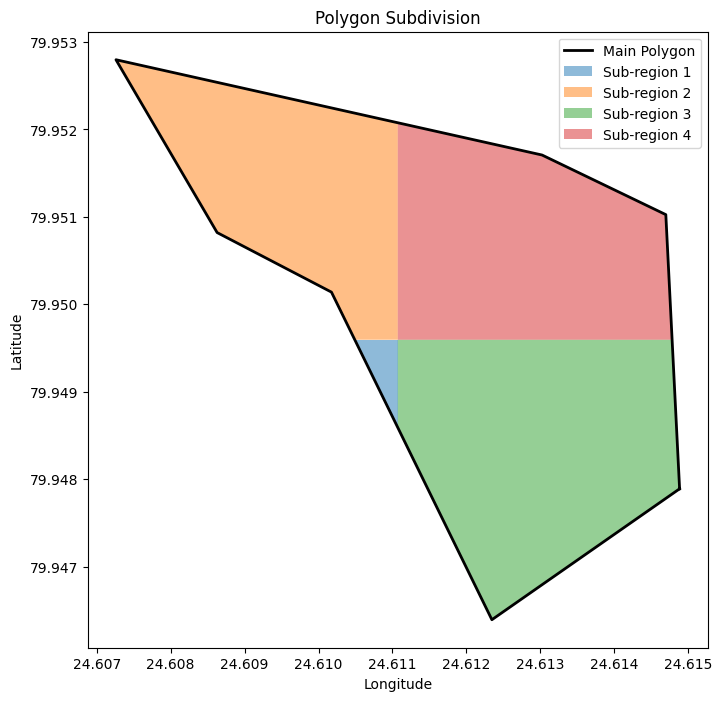

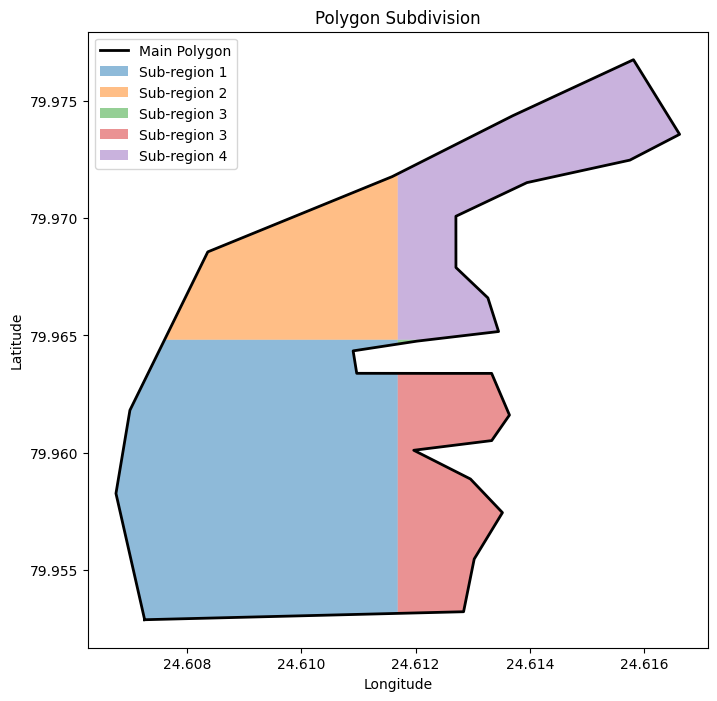

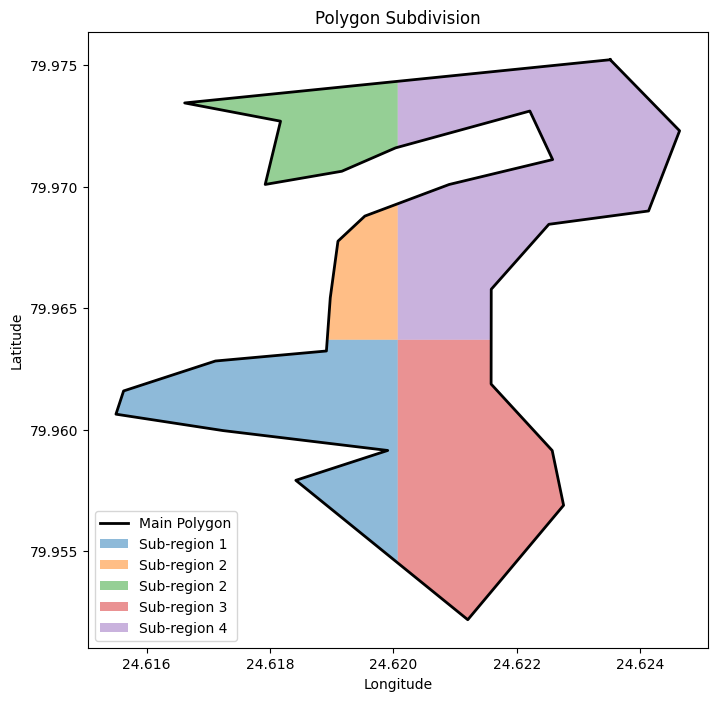

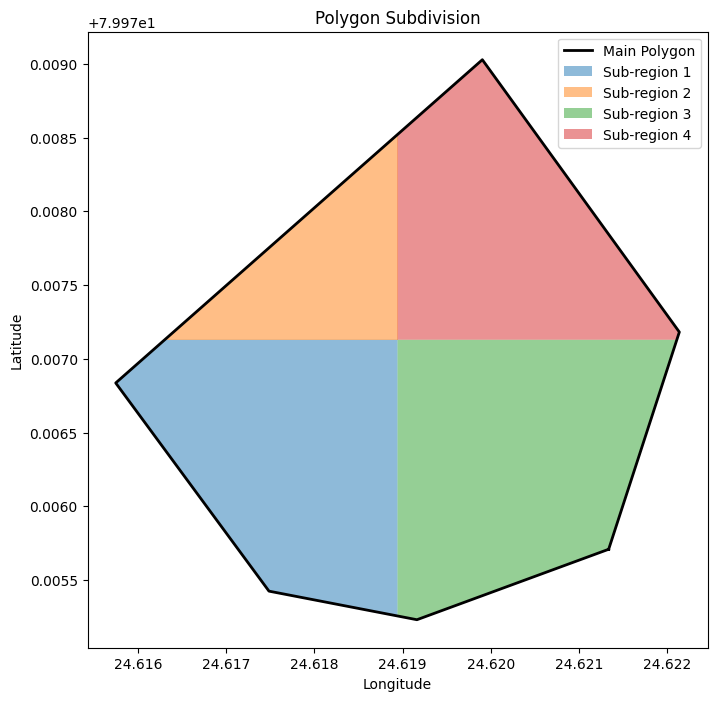

In [ ]:
import matplotlib.pyplot as plt
import shapely.geometry as geom
import shapely.ops as ops
from shapely.geometry import Polygon, MultiPolygon, Point
import matplotlib.patches as patches
import numpy as np

def divide_polygon(polygon, num_sub_regions=5):
    """
    Divide a polygon into approximately equal sub-regions.

    Parameters:
        polygon (shapely.geometry.Polygon): Input polygon.
        num_sub_regions (int): Number of sub-regions to divide into.

    Returns:
        list of shapely.geometry.Polygon or MultiPolygon: List of sub-regions.
    """
    # Calculate approximate bounding box
    minx, miny, maxx, maxy = polygon.bounds

    # Calculate splits
    x_splits = np.linspace(minx, maxx, int(np.sqrt(num_sub_regions)) + 1)
    y_splits = np.linspace(miny, maxy, int(np.sqrt(num_sub_regions)) + 1)

    sub_regions = []
    for i in range(len(x_splits) - 1):
        for j in range(len(y_splits) - 1):
            # Create sub-box as a rectangle
            sub_box = Polygon([
                (x_splits[i], y_splits[j]),
                (x_splits[i + 1], y_splits[j]),
                (x_splits[i + 1], y_splits[j + 1]),
                (x_splits[i], y_splits[j + 1]),
                (x_splits[i], y_splits[j])
            ])

            # Intersect with the original polygon
            intersection = polygon.intersection(sub_box)
            if not intersection.is_empty:
                sub_regions.append(intersection)

    return sub_regions

def plot_polygon_with_subregions(polygon, sub_regions):
    """
    Plot the main polygon and its sub-regions with different colors.

    Parameters:
        polygon (shapely.geometry.Polygon): Main polygon.
        sub_regions (list of shapely.geometry.Polygon or MultiPolygon): Sub-regions.
    """
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the main polygon
    x, y = polygon.exterior.xy
    ax.plot(x, y, 'k-', lw=2, label='Main Polygon')

    # Plot sub-regions
    for idx, sub_region in enumerate(sub_regions):
        if isinstance(sub_region, Polygon):
            x, y = sub_region.exterior.xy
            ax.fill(x, y, alpha=0.5, label=f'Sub-region {idx + 1}')
        elif isinstance(sub_region, MultiPolygon):
            for part in sub_region.geoms:
                x, y = part.exterior.xy
                ax.fill(x, y, alpha=0.5, label=f'Sub-region {idx + 1}')

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Polygon Subdivision')
    ax.legend()
    plt.show()

# Define the outer bounding box as a polygon
outer_bounding_box_coords = [
    (24.614883053980265, 79.94788978214841),
    (24.612344562145235, 79.94639217473151),
    (24.61017499559828, 79.95013936775565),
    (24.608628618896944, 79.950820617316),
    (24.607260630382036, 79.95279768141447),
    (24.61302275260125, 79.9517076681399),
    (24.61469672945946, 79.95102573162936),
    (24.614883053980265, 79.94788978214841)
]

outer_bounding_box_coords1=[(24.614883053980265, 79.94788978214841),(24.612344562145235, 79.94639217473151),
      (24.61017499559828, 79.95013936775565),(24.608628618896944, 79.950820617316),
      (24.607260630382036, 79.95279768141447),(24.61302275260125, 79.9517076681399),
      (24.61469672945946, 79.95102573162936),(24.614883053980265, 79.94788978214841)
      ]

outer_bounding_box_coords2=[(24.607260419532132, 79.95286590242046),(24.606758688869416, 79.95825536769982),
      (24.607002674374026, 79.96180636199284),(24.60836456545249, 79.96856574134728),
      (24.611589410917315, 79.97177869854889),(24.613698490363703, 79.97437768744398),
      (24.61580857705941, 79.97676773843858),(24.61661572756599, 79.97358325167095),
      (24.61574632876914, 79.97248267044631),(24.613945555955183, 79.97152198415897),
      (24.61270375578348, 79.9700864336761),(24.612704495033825, 79.96789849150325),
      (24.613263348292918, 79.96660158920399),(24.613449884212375, 79.96516678925073),
      (24.612021842767245, 79.96475613139786),(24.610906411033973, 79.96434081300161),
      (24.610969400481107, 79.96338311086693),(24.61246012436958, 79.96337982884245),
      (24.613328717199867, 79.96338026353132),(24.61364027789026, 79.9616016860183),
      (24.613329684553467, 79.96051153470619),(24.61196673200461, 79.9600982827545),
      (24.612958350002163, 79.95887206320937),(24.613517697634133, 79.95743715733985),
      (24.613023664995094, 79.95545659301173),(24.612837804941353, 79.95320698946405),
      (24.607260419532132, 79.95286590242046)]

outer_bounding_box_coords3= [(24.623512525820836, 79.97522421856658),(24.62463679368871, 79.97230075751973),
      (24.624133678338755, 79.96900146486215),(24.622517925186102, 79.96845272147458),
      (24.621584046088604, 79.96577961202294),(24.62158194518423, 79.96188043521298),
      (24.62257207511831, 79.95914532347805),(24.622756701146628, 79.95689203613284),
      (24.621203842099114, 79.95218425150095),(24.61841710216739, 79.95791966332416),
      (24.61990609198727, 79.95914820088615),(24.61723808725748, 79.9599654802701),
      (24.615501938816678, 79.96064126570452),(24.61562578155107, 79.96159671412529),
      (24.617113761697762, 79.96282850250655),(24.618912698310957, 79.96324047854522),
      (24.61897523526878, 79.9654293061008),(24.619100088825277, 79.96775821995715),
      (24.619535774054988, 79.96879144922023),(24.620902368862982, 79.97009131803797),
      (24.622579123457676, 79.97111559719735),(24.622209859674655, 79.9731131229687),
      (24.62003285021468, 79.97159659189016),(24.619162854570725, 79.97063600255227),
      (24.617920857688777, 79.97009241582825),(24.618169322451124, 79.97269535267645),
      (24.616615758716147, 79.97344580883015),(24.623512525820836, 79.97522421856658)
      ]

outer_bounding_box_coords4= [(24.621338698953622, 79.97570802660002),(24.619163638647304, 79.97523013838052),
      (24.6174852486879, 79.97542394573331),(24.615746487415223, 79.97683611021225),
      (24.619905663326765, 79.97902856406425),(24.622140457129376, 79.97718147921937),
      (24.621338698953622, 79.97570802660002)]

sd_outer_polygon1 = Polygon(outer_bounding_box_coords1)
sd_outer_polygon2 = Polygon(outer_bounding_box_coords2)
sd_outer_polygon3 = Polygon(outer_bounding_box_coords3)
sd_outer_polygon4 = Polygon(outer_bounding_box_coords4)

# Divide the polygon into 5 sub-regions
sd_sub_regions1 = divide_polygon(sd_outer_polygon1, num_sub_regions=5)
sd_sub_regions2 = divide_polygon(sd_outer_polygon2, num_sub_regions=5)
sd_sub_regions3 = divide_polygon(sd_outer_polygon3, num_sub_regions=5)
sd_sub_regions4 = divide_polygon(sd_outer_polygon4, num_sub_regions=5)

# Print sub-region information
# for idx, sub_region in enumerate(sub_regions):
#     print(f"Sub-region {idx + 1}: {sub_region}")

# Visualize the results
plot_polygon_with_subregions(sd_outer_polygon1, sd_sub_regions1)
plot_polygon_with_subregions(sd_outer_polygon2, sd_sub_regions2)
plot_polygon_with_subregions(sd_outer_polygon3, sd_sub_regions3)
plot_polygon_with_subregions(sd_outer_polygon4, sd_sub_regions4)



In [ ]:
sd_sub_regions4

[<POLYGON ((24.617 79.975, 24.616 79.977, 24.616 79.977, 24.619 79.977, 24.61...>,
 <POLYGON ((24.619 79.979, 24.619 79.977, 24.616 79.977, 24.619 79.979))>,
 <POLYGON ((24.619 79.975, 24.619 79.975, 24.619 79.977, 24.622 79.977, 24.62...>,
 <POLYGON ((24.62 79.979, 24.622 79.977, 24.622 79.977, 24.619 79.977, 24.619...>]

In [ ]:
sd_sub_region=sd_sub_regions1+sd_sub_regions2+sd_sub_regions3+sd_sub_regions4

In [ ]:
sd_sub_region

[<POLYGON ((24.61 79.95, 24.611 79.95, 24.611 79.949, 24.61 79.95))>,
 <POLYGON ((24.61 79.95, 24.609 79.951, 24.607 79.953, 24.611 79.952, 24.611 ...>,
 <POLYGON ((24.612 79.946, 24.611 79.949, 24.611 79.95, 24.615 79.95, 24.615 ...>,
 <POLYGON ((24.613 79.952, 24.615 79.951, 24.615 79.95, 24.611 79.95, 24.611 ...>,
 <POLYGON ((24.607 79.958, 24.607 79.962, 24.608 79.965, 24.612 79.965, 24.61...>,
 <POLYGON ((24.608 79.969, 24.612 79.972, 24.612 79.972, 24.612 79.965, 24.60...>,
 <MULTIPOLYGON (((24.612 79.965, 24.612 79.965, 24.612 79.965, 24.612 79.965,...>,
 <POLYGON ((24.614 79.974, 24.616 79.977, 24.617 79.974, 24.616 79.972, 24.61...>,
 <POLYGON ((24.618 79.958, 24.62 79.959, 24.617 79.96, 24.616 79.961, 24.616 ...>,
 <MULTIPOLYGON (((24.619 79.965, 24.619 79.968, 24.62 79.969, 24.62 79.969, 2...>,
 <POLYGON ((24.622 79.962, 24.623 79.959, 24.623 79.957, 24.621 79.952, 24.62...>,
 <POLYGON ((24.625 79.972, 24.624 79.969, 24.623 79.968, 24.622 79.966, 24.62...>,
 <POLYGON ((24.61

In [ ]:
import matplotlib.pyplot as plt
import shapely.geometry as geom
import shapely.ops as ops
from shapely.geometry import Polygon, Point, MultiPolygon
import matplotlib.patches as patches
import numpy as np
import pandas as pd


def divide_polygon(polygon, num_sub_regions=5):
    """
    Divide a polygon into approximately equal sub-regions.

    Parameters:
        polygon (shapely.geometry.Polygon): Input polygon.
        num_sub_regions (int): Number of sub-regions to divide into.

    Returns:
        list of shapely.geometry.Polygon: List of sub-regions.
    """
    minx, miny, maxx, maxy = polygon.bounds
    x_splits = np.linspace(minx, maxx, int(np.sqrt(num_sub_regions)) + 1)
    y_splits = np.linspace(miny, maxy, int(np.sqrt(num_sub_regions)) + 1)

    sub_regions = []
    for i in range(len(x_splits) - 1):
        for j in range(len(y_splits) - 1):
            sub_box = Polygon([
                (x_splits[i], y_splits[j]),
                (x_splits[i + 1], y_splits[j]),
                (x_splits[i + 1], y_splits[j + 1]),
                (x_splits[i], y_splits[j + 1]),
                (x_splits[i], y_splits[j])
            ])

            intersection = polygon.intersection(sub_box)
            if not intersection.is_empty:
                sub_regions.append(intersection)

    return sub_regions

def plot_polygon_with_subregions(polygon, sub_regions):
    """
    Plot the main polygon and its sub-regions with different colors.

    Parameters:
        polygon (shapely.geometry.Polygon): Main polygon.
        sub_regions (list of shapely.geometry.Polygon): Sub-regions.
    """
    fig, ax = plt.subplots(figsize=(8, 8))

    x, y = polygon.exterior.xy
    ax.plot(x, y, 'k-', lw=2, label='Main Polygon')

    for idx, sub_region in enumerate(sub_regions):
        if isinstance(sub_region, Polygon):
            x, y = sub_region.exterior.xy
            ax.fill(x, y, alpha=0.5, label=f'Sub-region {idx + 1}')
        elif isinstance(sub_region, MultiPolygon):
            for part in sub_region.geoms:
                x, y = part.exterior.xy
                ax.fill(x, y, alpha=0.5, label=f'Sub-region {idx + 1}')

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Polygon Subdivision')
    ax.legend()
    plt.show()

# Define the function to adjust rainfall data based on sub-regions
def adjust_rainfall_data(df, sub_regions):
    """
    Adjust rainfall data based on sub-regions.

    Parameters:
        df (pd.DataFrame): DataFrame with latitude, longitude, year, and monthly rainfall columns.
        sub_regions (list of shapely.geometry.Polygon): List of sub-regions.

    Returns:
        pd.DataFrame: DataFrame with adjusted rainfall data.
    """
    # Create a function to determine the adjustment for each sub-region
    def apply_adjustment(row, sub_region_idx):
        if sub_region_idx == 0:
            row[["JAN", "FEB", "MAR", "APR", "MAY"]] += 8
            row[["JUN", "JUL", "AUG", "SEP"]] += 44
            row[["OCT", "NOV", "DEC"]] += 3
        elif sub_region_idx == 1:
            row[["JAN", "FEB", "MAR", "APR", "MAY"]] -= 4
            row[["JUN", "JUL", "AUG", "SEP"]] += 39
            row[["OCT", "NOV", "DEC"]] += 6
        elif sub_region_idx == 2:
            row[["JAN", "FEB", "MAR", "APR", "MAY"]] += 4
            row[["JUN", "JUL", "AUG", "SEP"]] += 27
            row[["OCT", "NOV", "DEC"]] -= 6
        elif sub_region_idx == 3:
            row[["JAN", "FEB", "MAR", "APR", "MAY"]] += 9
            row[["JUN", "JUL", "AUG", "SEP"]] += 31
            row[["OCT", "NOV", "DEC"]] -= 1
        return row

    # Iterate through sub-regions and apply adjustments
    for idx, sub_region in enumerate(sub_regions):
        contained_points = df.apply(
            lambda row: Point(row["latitude"], row["longitude"]).within(sub_region), axis=1
        )
        df.loc[contained_points, :] = df[contained_points].apply(lambda row: apply_adjustment(row, idx), axis=1)

    return df

# Define the outer bounding box as a polygon
outer_bounding_box_coords = [(24.612282521722864, 79.94632396546983),(24.614883053980265, 79.94788978214841),
                                           (24.61736155303235, 79.94782414835498),(24.619655494995463, 79.95061663770908),
                                           (24.621265739822782, 79.95211605835767),(24.62052194578654, 79.94809465167943),
                                           (24.61921999799077, 79.94475662201907),
                                           (24.616494856125442, 79.94265157017125),(24.614575904458537, 79.94339881414824),(24.612282521722864, 79.94632396546983)]
outer_polygon = Polygon(outer_bounding_box_coords)

# Divide the polygon into 5 sub-regions
sub_regions = divide_polygon(outer_polygon, num_sub_regions=5)


# Adjust the rainfall data
adjusted_df = adjust_rainfall_data(ll_r_tl_merged_df, sub_regions)

# Print the adjusted DataFrame
adjusted_df.head()


,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,2.4,23.0,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628,1.8,29.6,1.2,0.2,5.2,93.5,84.7,491.8,192.1,43.1,5.6,1.2
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355,0.7,59.6,2.2,1.0,0.4,119.9,366.8,370.2,493.3,20.5,0.5,2.9
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609,19.8,0.4,0.0,1.7,3.9,208.1,203.1,369.1,119.9,25.2,4.1,0.0
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693,35.2,10.6,27.4,3.4,41.7,163.9,597.2,256.6,198.4,27.6,0.0,4.4


In [ ]:
sub_regions

[<POLYGON ((24.607 79.958, 24.607 79.962, 24.608 79.965, 24.612 79.965, 24.61...>,
 <POLYGON ((24.608 79.969, 24.612 79.972, 24.612 79.972, 24.612 79.965, 24.60...>,
 <MULTIPOLYGON (((24.612 79.965, 24.612 79.965, 24.612 79.965, 24.612 79.965,...>,
 <POLYGON ((24.614 79.974, 24.616 79.977, 24.617 79.974, 24.616 79.972, 24.61...>]

In [ ]:
adjusted_df.head()

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,2.4,23.0,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628,1.8,29.6,1.2,0.2,5.2,93.5,84.7,491.8,192.1,43.1,5.6,1.2
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355,0.7,59.6,2.2,1.0,0.4,119.9,366.8,370.2,493.3,20.5,0.5,2.9
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609,19.8,0.4,0.0,1.7,3.9,208.1,203.1,369.1,119.9,25.2,4.1,0.0
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693,35.2,10.6,27.4,3.4,41.7,163.9,597.2,256.6,198.4,27.6,0.0,4.4


In [ ]:
len(adjusted_df)

57256

In [ ]:
adjusted_df.to_csv("adjusted_df_new_final.csv", index=False)

In [ ]:
#Code start
file_path = '/content/adjusted_df_new_final.csv'
df = pd.read_csv(file_path)
df.head()

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,2.4,23.0,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628,1.8,29.6,1.2,0.2,5.2,93.5,84.7,491.8,192.1,43.1,5.6,1.2
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355,0.7,59.6,2.2,1.0,0.4,119.9,366.8,370.2,493.3,20.5,0.5,2.9
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609,19.8,0.4,0.0,1.7,3.9,208.1,203.1,369.1,119.9,25.2,4.1,0.0
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693,35.2,10.6,27.4,3.4,41.7,163.9,597.2,256.6,198.4,27.6,0.0,4.4


In [ ]:
# Melt the DataFrame
melted_df = pd.melt(
    df,
    id_vars=['latitude', 'longitude', 'forest_type', 'altitude', 'color', 'year','tree_cover_loss__ha','gfw_gross_emissions_co2e_all_gases__Mg'],
    value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
    var_name='month',
    value_name='rainfall'
)

# Result
melted_df.head()

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,month,rainfall
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,JAN,2.3
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628,JAN,1.8
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355,JAN,0.7
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609,JAN,19.8
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693,JAN,35.2


In [ ]:
len(melted_df)

687072

In [ ]:
melted_df.to_csv("melted_df_initial.csv", index=False)

In [ ]:
#Code start
file_path = '/content/adjusted_df_new_final.csv'
df = pd.read_csv(file_path)
# Display the first few rows to understand the dataset
df.head()

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,2.4,23.0,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628,1.8,29.6,1.2,0.2,5.2,93.5,84.7,491.8,192.1,43.1,5.6,1.2
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355,0.7,59.6,2.2,1.0,0.4,119.9,366.8,370.2,493.3,20.5,0.5,2.9
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609,19.8,0.4,0.0,1.7,3.9,208.1,203.1,369.1,119.9,25.2,4.1,0.0
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693,35.2,10.6,27.4,3.4,41.7,163.9,597.2,256.6,198.4,27.6,0.0,4.4


In [ ]:
filtered_df = df[df['year'] == 2001]
filtered_df.head()


,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,2.4,23.0,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0
17,24.606942,79.955884,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,2.4,23.0,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0
34,24.606942,79.956222,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,2.4,23.0,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0
51,24.606942,79.956560,Water,361.0,blue,2001,0.280174,115.511439,9.3,7.8,9.4,30.0,19.4,245.5,458.4,233.9,40.4,115.0,6.0,5.0
68,24.606942,79.956897,Water,361.0,blue,2001,0.280174,115.511439,9.3,7.8,9.4,30.0,19.4,245.5,458.4,233.9,40.4,115.0,6.0,5.0


In [ ]:
len(filtered_df)

3368

In [ ]:
filtered_df.to_csv("filtered_data_2001.csv", index=False)

In [ ]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm  # Import tqdm for progress bar


file_path = 'filtered_data_2001.csv'
data = pd.read_csv(file_path)

# Check for necessary columns
required_columns = {'latitude', 'longitude', 'altitude'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"Dataset must contain the following columns: {required_columns}")

# Function to calculate slope
def calculate_slope(point1, point2):
    lat1, lon1, alt1 = point1
    lat2, lon2, alt2 = point2

    # Calculate horizontal distance in meters
    horizontal_distance = geodesic((lat1, lon1), (lat2, lon2)).meters

    # Calculate vertical change
    vertical_change = abs(alt2 - alt1)

    # Avoid division by zero
    if horizontal_distance == 0:
        return 0

    # Calculate slope as a percentage
    slope = (vertical_change / horizontal_distance) * 100
    return slope

# Calculate slopes and classify
def classify_terrain(data, max_distance=50):
    slopes = []
    classifications = []

    # Iterate through each point with a progress bar
    for idx, row in tqdm(data.iterrows(), total=len(data), desc="Processing points", unit="point"):
        lat, lon, alt = row['latitude'], row['longitude'], row['altitude']
        current_point = (lat, lon, alt)

        # Calculate slopes to all other points
        slopes_to_others = []
        for _, other_row in data.iterrows():
            if idx == other_row.name:
                continue
            other_point = (other_row['latitude'], other_row['longitude'], other_row['altitude'])
            distance = geodesic((lat, lon), (other_row['latitude'], other_row['longitude'])).meters

            if distance <= max_distance:  # Limit to nearby points within max_distance
                slope = calculate_slope(current_point, other_point)
                slopes_to_others.append(slope)

        # Calculate the maximum slope for the current point
        max_slope = max(slopes_to_others) if slopes_to_others else 0
        slopes.append(max_slope)

        # Classify the terrain
        if max_slope <= 5:
            classifications.append("Walkable")
        elif max_slope <= 30:
            classifications.append("Steep")
        else:
            classifications.append("Cliff")

    data['max_slope'] = slopes
    data['terrain_classification'] = classifications
    return data

# Apply the function
result_data = classify_terrain(data)

Processing points: 100%|██████████| 3368/3368 [59:25<00:00,  1.06s/point]


In [ ]:
result_data.head()

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,JAN,FEB,...,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,max_slope,terrain_classification
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,...,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0,0.000000,Walkable
1,24.606942,79.955884,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,...,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0,0.000000,Walkable
2,24.606942,79.956222,Water,362.0,blue,2001,0.280174,115.511439,2.3,0.8,...,12.4,255.5,468.4,243.9,50.4,110.0,1.0,0.0,2.925318,Walkable
3,24.606942,79.956560,Water,361.0,blue,2001,0.280174,115.511439,9.3,7.8,...,19.4,245.5,458.4,233.9,40.4,115.0,6.0,5.0,2.925318,Walkable
4,24.606942,79.956897,Water,361.0,blue,2001,0.280174,115.511439,9.3,7.8,...,19.4,245.5,458.4,233.9,40.4,115.0,6.0,5.0,0.000000,Walkable


In [ ]:
result_data.to_csv("terrain_classified_data.csv", index=False)

In [ ]:
import pandas as pd
file_path1 = '/content/melted_df_initial.csv'
data1 = pd.read_csv(file_path1)
file_path2 = '/content/terrain_classified_data.csv'
data2 = pd.read_csv(file_path2)
#Drop columns
data2 = data2.drop(columns=['color', 'year', 'tree_cover_loss__ha', 'gfw_gross_emissions_co2e_all_gases__Mg','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
#join data1 and data2
merged_df = pd.merge(data1, data2, on=['latitude', 'longitude', 'forest_type', 'altitude'])
merged_df.head()

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,month,rainfall,max_slope,terrain_classification
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,JAN,2.3,0.0,Walkable
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628,JAN,1.8,0.0,Walkable
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355,JAN,0.7,0.0,Walkable
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609,JAN,19.8,0.0,Walkable
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693,JAN,35.2,0.0,Walkable


In [ ]:
merged_df.to_csv("melted_df_and_terrain_classified_data.csv", index=False)

In [ ]:
len(merged_df)

687072

In [ ]:
# Load the dataset
file_path = '/content/melted_df_and_terrain_classified_data_updt.csv'
df = pd.read_csv(file_path)

# Apply the classification logic
def classify_terrain_final(row):
  if row['max_slope'] <= 5:
    return 'Walkable'
  elif row['max_slope'] <= 15:
    return 'Steep'
  else:
    return 'Cliff'

df['terrain_classification'] = df.apply(classify_terrain_final, axis=1)

df.head()

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,month,rainfall,max_slope,terrain_classification
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,JAN,2.3,0.0,Walkable
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628,JAN,1.8,0.0,Walkable
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355,JAN,0.7,0.0,Walkable
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609,JAN,19.8,0.0,Walkable
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693,JAN,35.2,0.0,Walkable


In [ ]:
df.to_csv("melted_df_and_terrain_classified_data_updt.csv", index=False)

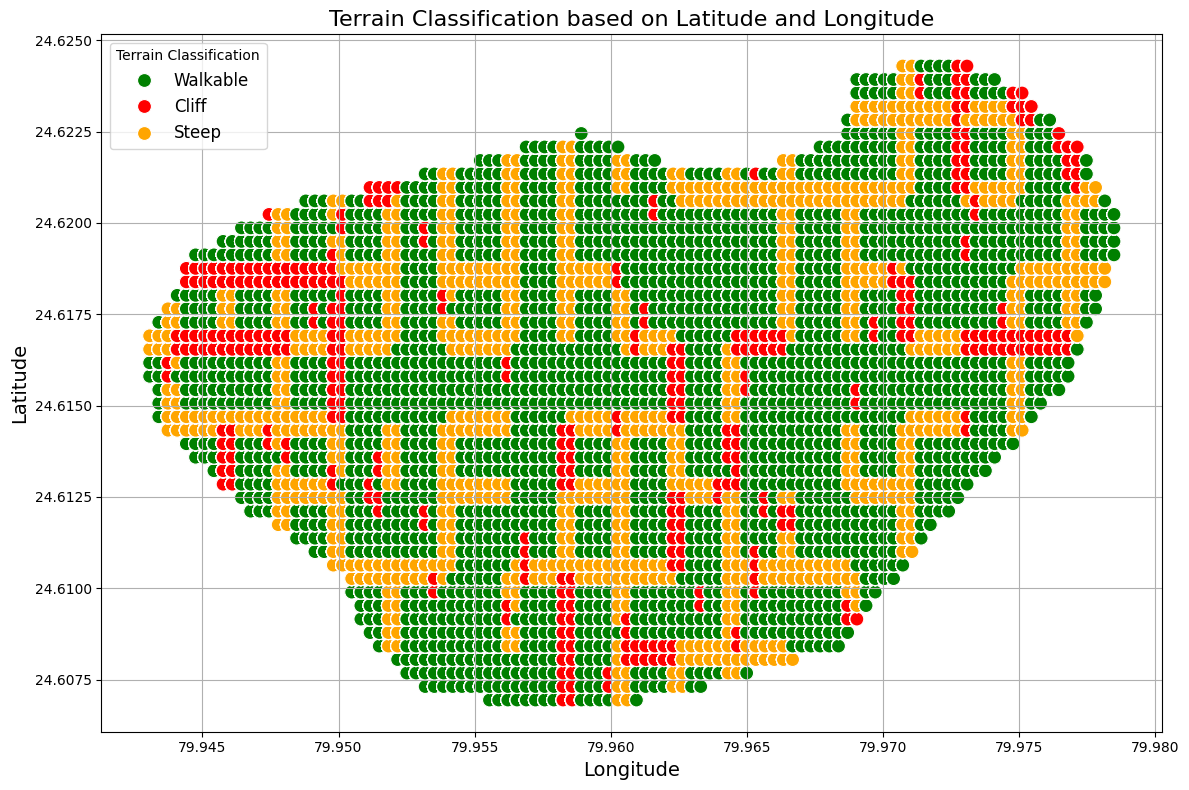

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/melted_df_and_terrain_classified_data_updt.csv'
df = pd.read_csv(file_path)

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='terrain_classification',
    data=df,
    palette={'Walkable': 'green', 'Steep': 'orange', 'Cliff': 'red'},
    s=100  # Adjust the size of the points for better visibility
)

# Customize the plot
plt.title('Terrain Classification based on Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Terrain Classification', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df.dtypes

,0
latitude,float64
longitude,float64
forest_type,object
altitude,float64
color,object
year,int64
tree_cover_loss__ha,float64
gfw_gross_emissions_co2e_all_gases__Mg,float64
month,object
rainfall,float64


In [ ]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

df = pd.read_csv("/content/melted_df_and_terrain_classified_data_updt.csv")

# Define a function to adjust the forest_type for water classification
def adjust_water_classification(df):
    # Convert month names to integers for easier processing
    month_map = {
        'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
    }
    df['month_num'] = df['month'].map(month_map)

    # Identify all unique forest types excluding 'Water'
    unique_forest_types = df['forest_type'].unique().tolist()
    unique_forest_types.remove('Water')  # Exclude 'Water' from the list of forest types

    # Initialize a dictionary to store the lat-lon points selected for water conversion per year
    water_conversion_map = {}

    # Iterate over each year in the dataset
    for year in tqdm(df['year'].unique(), desc="Processing years"):
        year_df = df[df['year'] == year]

        # Get the lat-lon points where terrain classification is 'Cliff'
        cliff_df = year_df[year_df['terrain_classification'] == 'Cliff']

        # Initialize an empty set to store the lat-lon points for this year that have been converted to Water
        converted_to_water = set()

        # Process each month within this year
        for month in range(6, 13):  # Months from June to December
            month_df = cliff_df[cliff_df['month_num'] == month]

            if month == 6:  # June - small percentage of cliff points converted to Water
                num_to_convert = int(len(month_df) * 0.05)  # Convert 5% of 'Cliff' points
            elif month == 7:  # July - slightly higher percentage (e.g., 10%)
                num_to_convert = int(len(month_df) * 0.10)
            elif month == 8:  # August - slightly higher again (e.g., 15%)
                num_to_convert = int(len(month_df) * 0.15)
            elif (month == 9):  # September - slightly higher again (e.g., 20%)
                num_to_convert = int(len(month_df) * 0.20)
            elif (month == 10):  # September - slightly higher again (e.g., 20%)
                num_to_convert = int(len(month_df) * 0.15)
            else:  # November onwards - no change or gradual decrease in Water classification
                num_to_convert = 0  # No new conversions, or gradual decrease could be applied

            # Ensure that points that were already converted remain converted in subsequent months
            remaining_points = set(month_df[~month_df['latitude'].isin(converted_to_water)].index)
            points_to_convert = random.sample(remaining_points, min(num_to_convert, len(remaining_points)))

            # Mark these points as converted to Water
            df.loc[points_to_convert, 'forest_type'] = 'Water'

            # Store the original forest type before conversion to 'Water'
            df.loc[points_to_convert, 'original_forest_type'] = year_df.loc[points_to_convert, 'forest_type']

            # Mark these points as converted to water
            converted_to_water.update(points_to_convert)

        # For months from October to February, gradually reduce the number of Water classifications
        for month in range(11, 13):
            month_df = cliff_df[cliff_df['month_num'] == month]

            # Gradual decrease in water classification
            num_to_remove = int(len(month_df) * 0.05)  # Gradual removal of Water points
            water_points = month_df[month_df['forest_type'] == 'Water']

            # Randomly select a subset of Water points to revert
            points_to_remove = random.sample(water_points.index.tolist(), min(num_to_remove, len(water_points)))

            # Revert points back to their original forest type
            for point in points_to_remove:
                original_forest_type = df.loc[point, 'original_forest_type']  # Get the original forest type before conversion
                df.loc[point, 'forest_type'] = original_forest_type  # Revert to the original forest type

    return df

# Apply the function to adjust the forest_type for water classification
df = adjust_water_classification(df)

# Result
print(df.head())

len(df)

Processing years:   0%|          | 0/17 [00:00<?, ?it/s]<ipython-input-48-76ccd557af1f>:54: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  points_to_convert = random.sample(remaining_points, min(num_to_convert, len(remaining_points)))
<ipython-input-48-76ccd557af1f>:54: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  points_to_convert = random.sample(remaining_points, min(num_to_convert, len(remaining_points)))
<ipython-input-48-76ccd557af1f>:54: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  points_to_convert = random.sample(remaining_points, min(num_to_convert, len(remaining_points)))
<ipython-input-48-76ccd557af1f>:54: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  points_to_convert = random.sample(remaining_points, 

    latitude  longitude forest_type  altitude color  year  \
0  24.606942  79.955547       Water     362.0  blue  2001   
1  24.606942  79.955547       Water     362.0  blue  2002   
2  24.606942  79.955547       Water     362.0  blue  2003   
3  24.606942  79.955547       Water     362.0  blue  2004   
4  24.606942  79.955547       Water     362.0  blue  2005   

   tree_cover_loss__ha  gfw_gross_emissions_co2e_all_gases__Mg month  \
0             0.280174                              115.511439   JAN   
1             1.542069                              541.752628   JAN   
2             0.770809                              306.504355   JAN   
3             0.492200                              172.488609   JAN   
4             1.823940                              777.814693   JAN   

   rainfall  max_slope terrain_classification  month_num original_forest_type  
0       2.3        0.0               Walkable          1                  NaN  
1       1.8        0.0               Wal

687072

In [ ]:
df.head()

,latitude,longitude,forest_type,altitude,color,year,tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,month,rainfall,max_slope,terrain_classification,month_num,original_forest_type
0,24.606942,79.955547,Water,362.0,blue,2001,0.280174,115.511439,JAN,2.3,0.0,Walkable,1,NaN
1,24.606942,79.955547,Water,362.0,blue,2002,1.542069,541.752628,JAN,1.8,0.0,Walkable,1,NaN
2,24.606942,79.955547,Water,362.0,blue,2003,0.770809,306.504355,JAN,0.7,0.0,Walkable,1,NaN
3,24.606942,79.955547,Water,362.0,blue,2004,0.492200,172.488609,JAN,19.8,0.0,Walkable,1,NaN
4,24.606942,79.955547,Water,362.0,blue,2005,1.823940,777.814693,JAN,35.2,0.0,Walkable,1,NaN


In [ ]:
df.to_csv("dynamic_water_modified_forest_data.csv", index=False)

<ipython-input-2-ba26c858b509>:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/dynamic_water_modified_forest_data.csv")


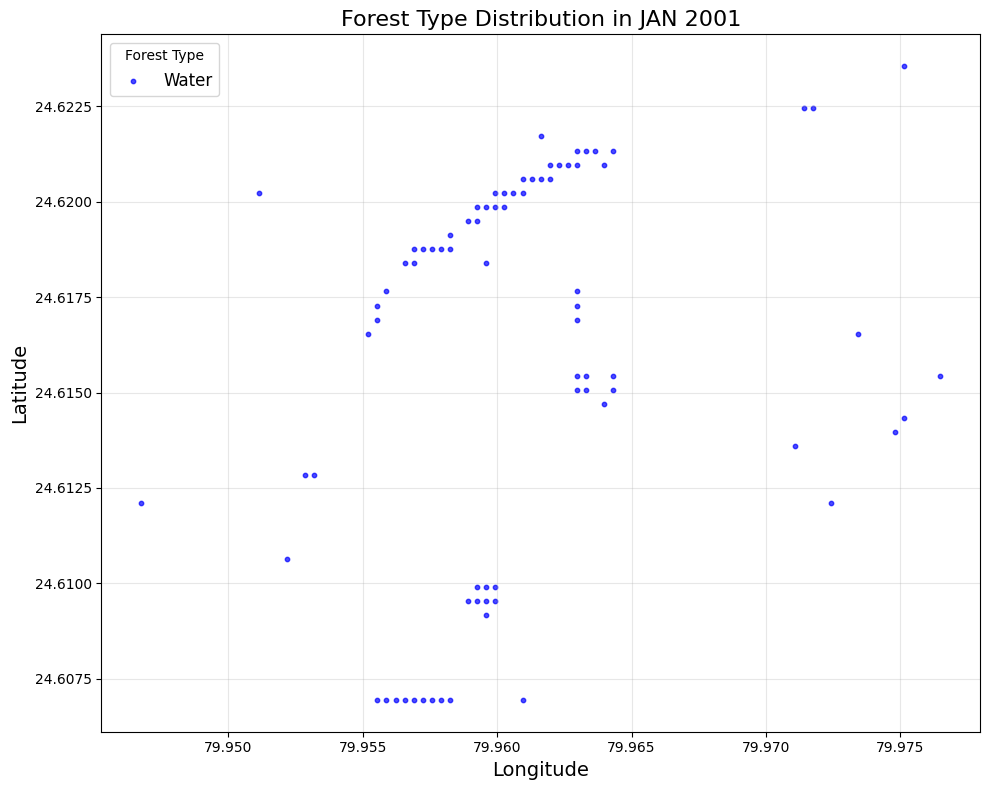

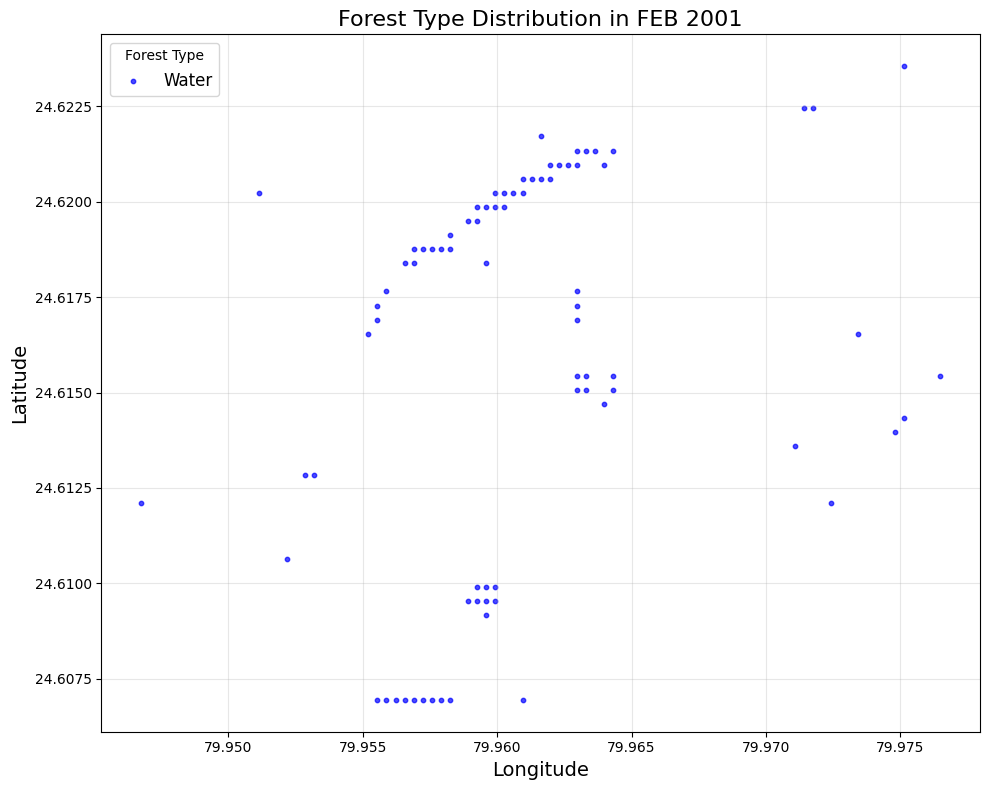

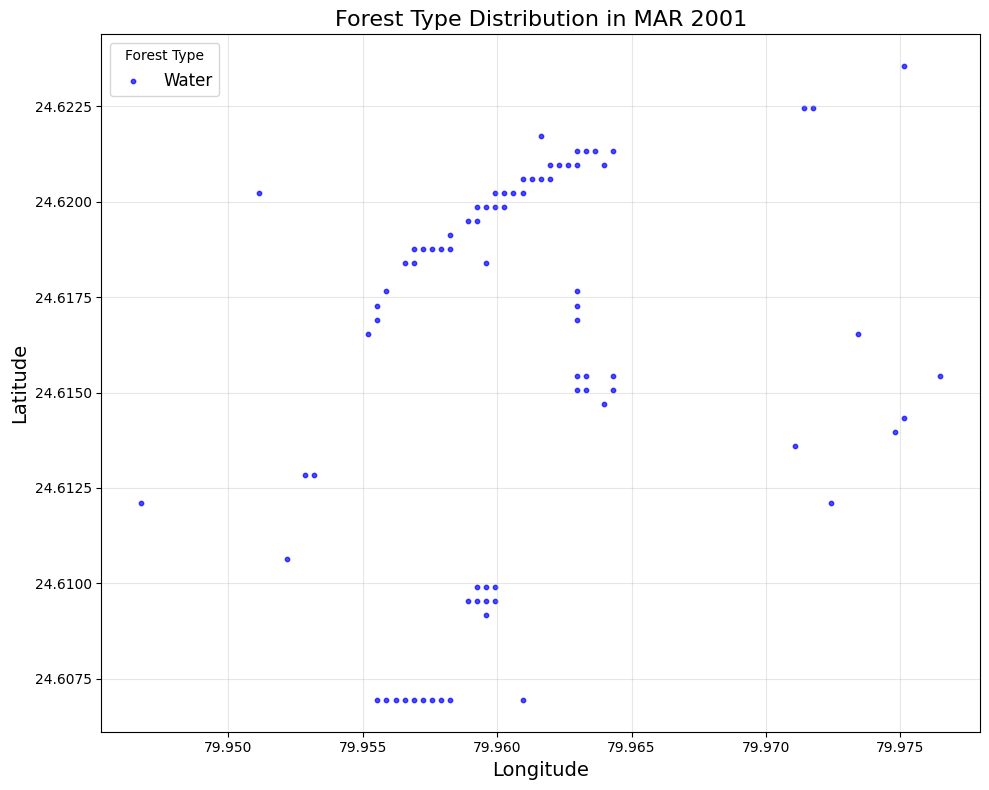

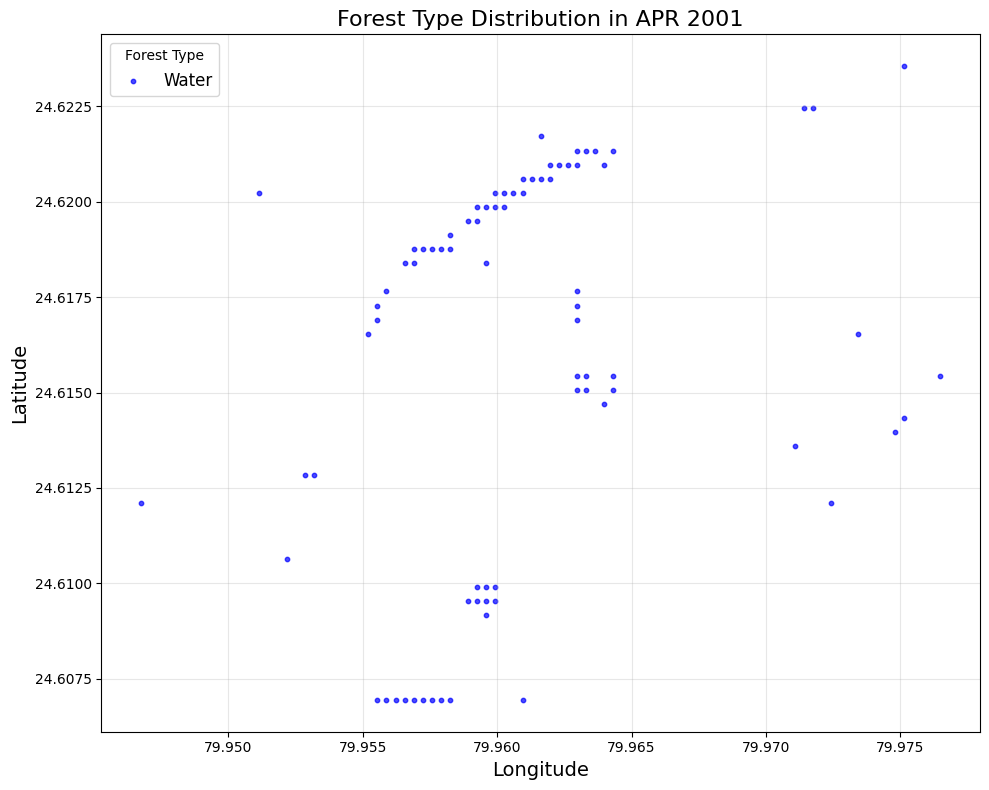

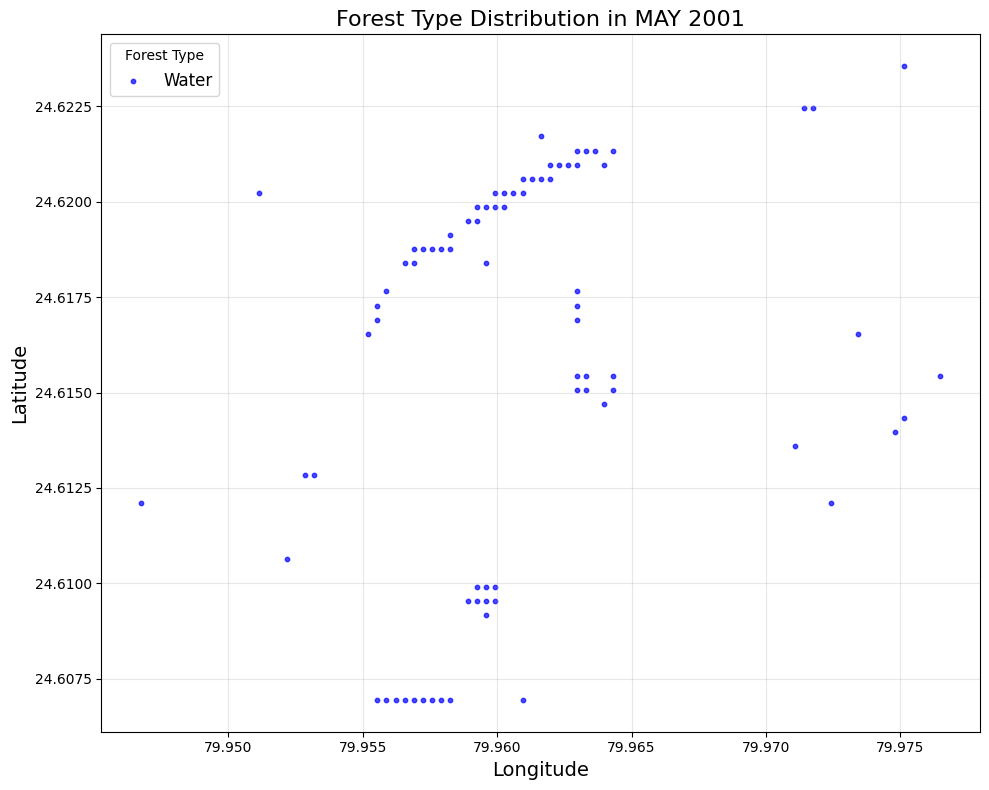

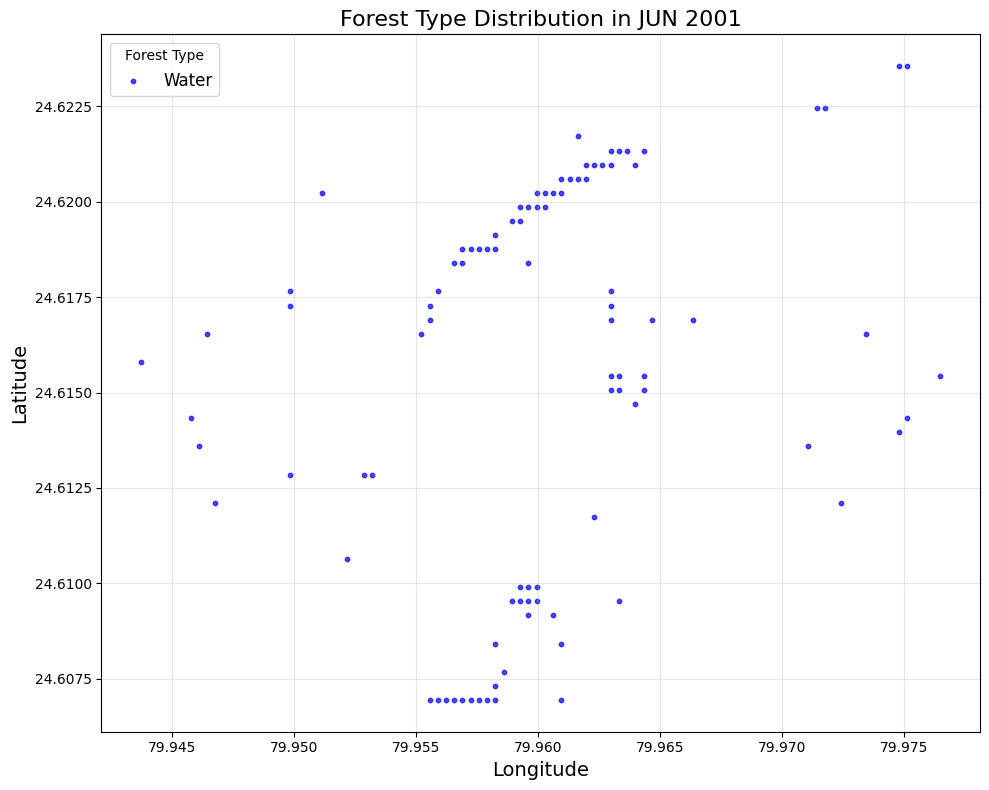

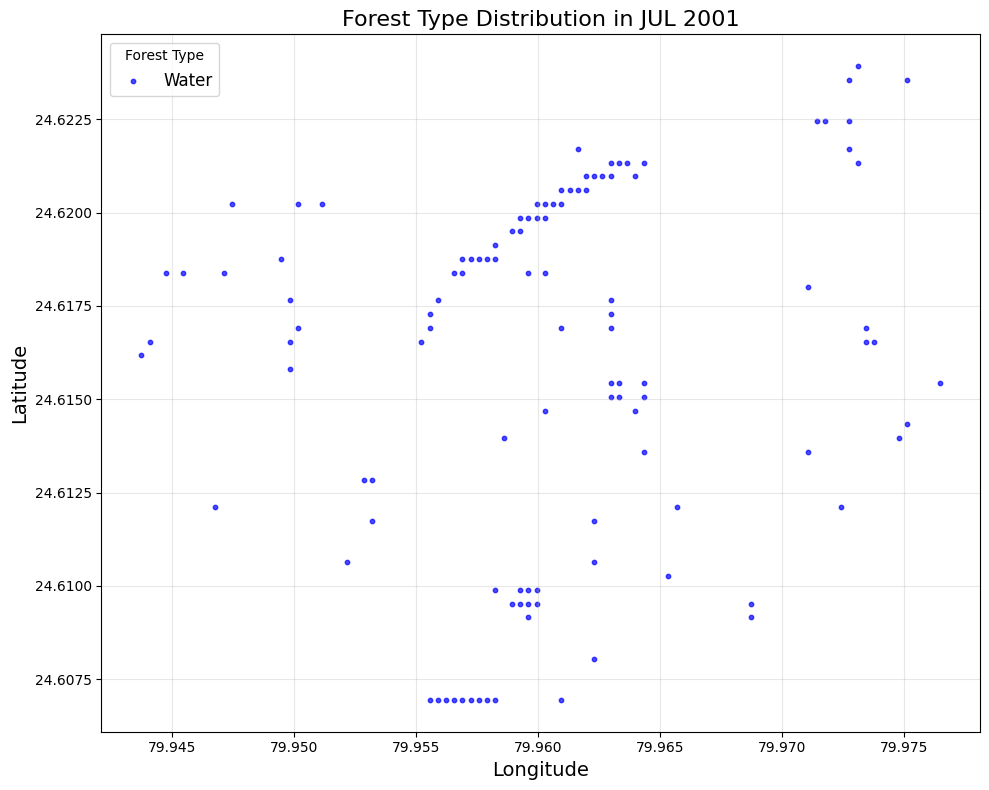

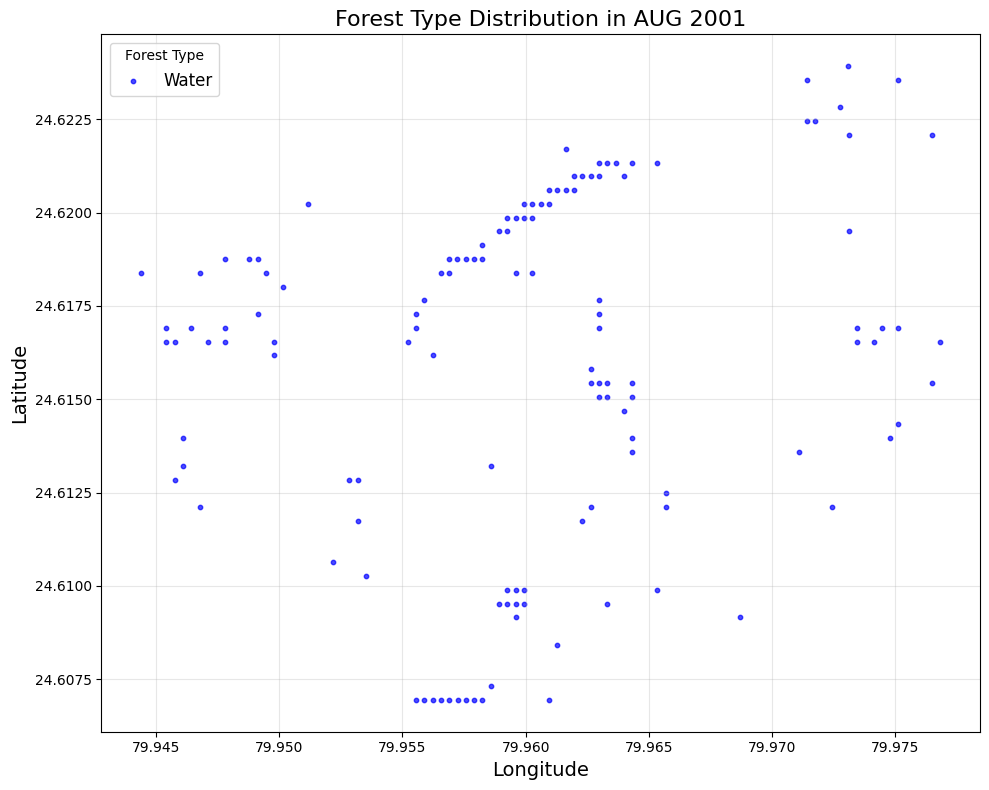

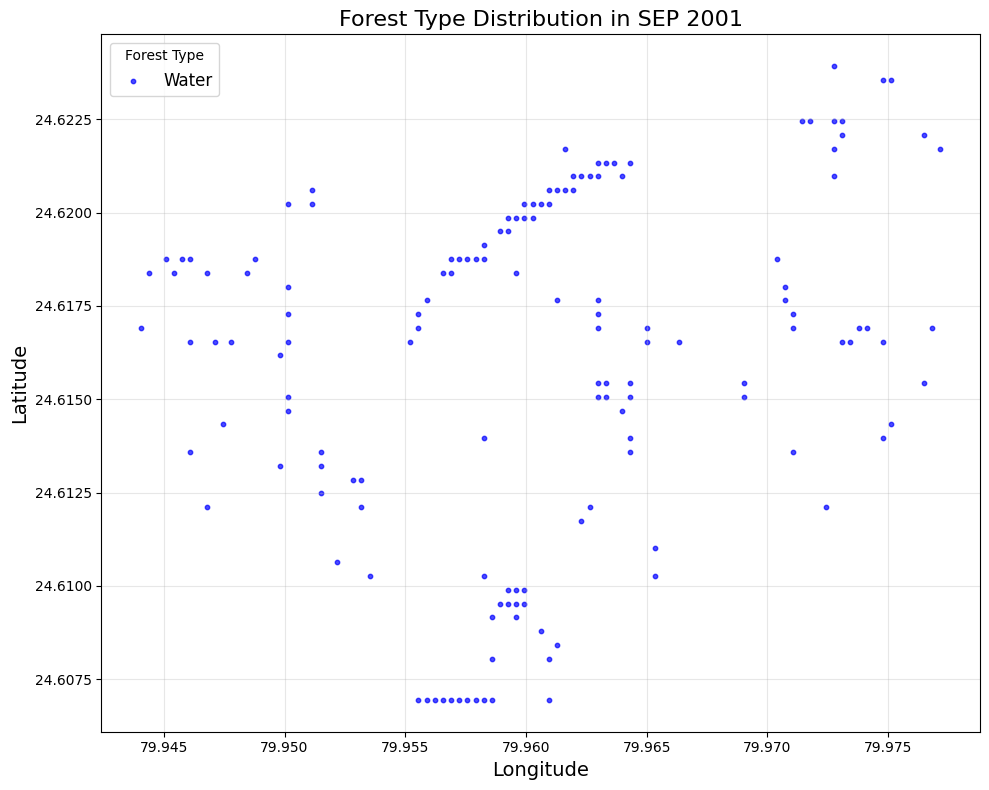

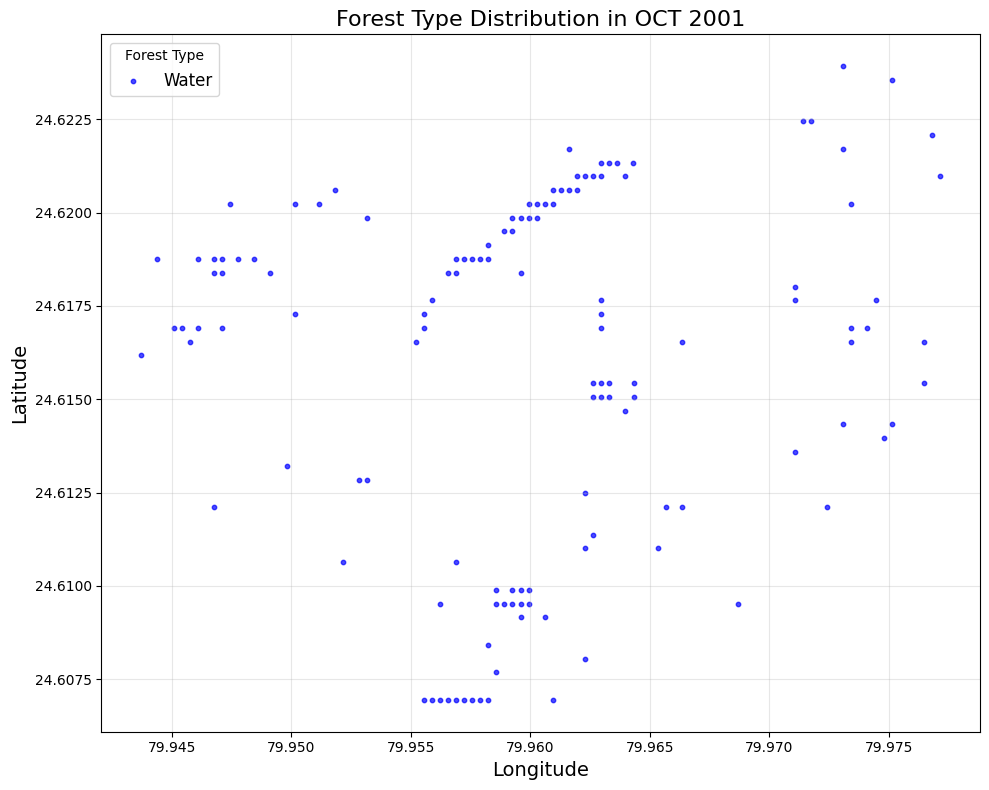

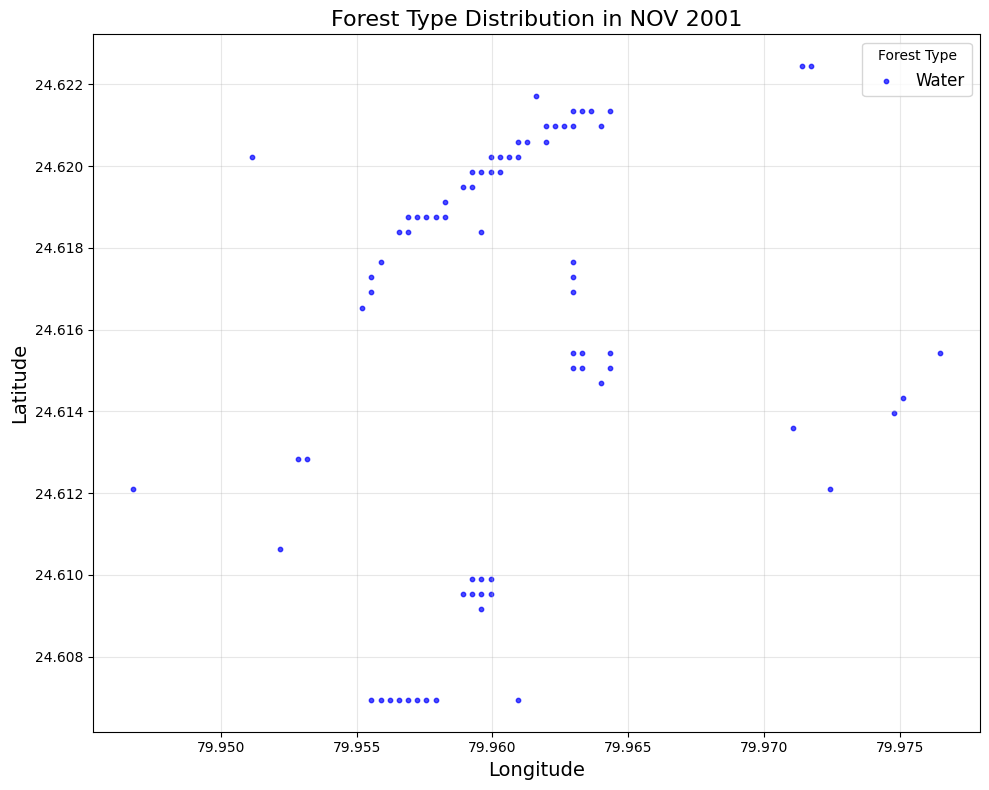

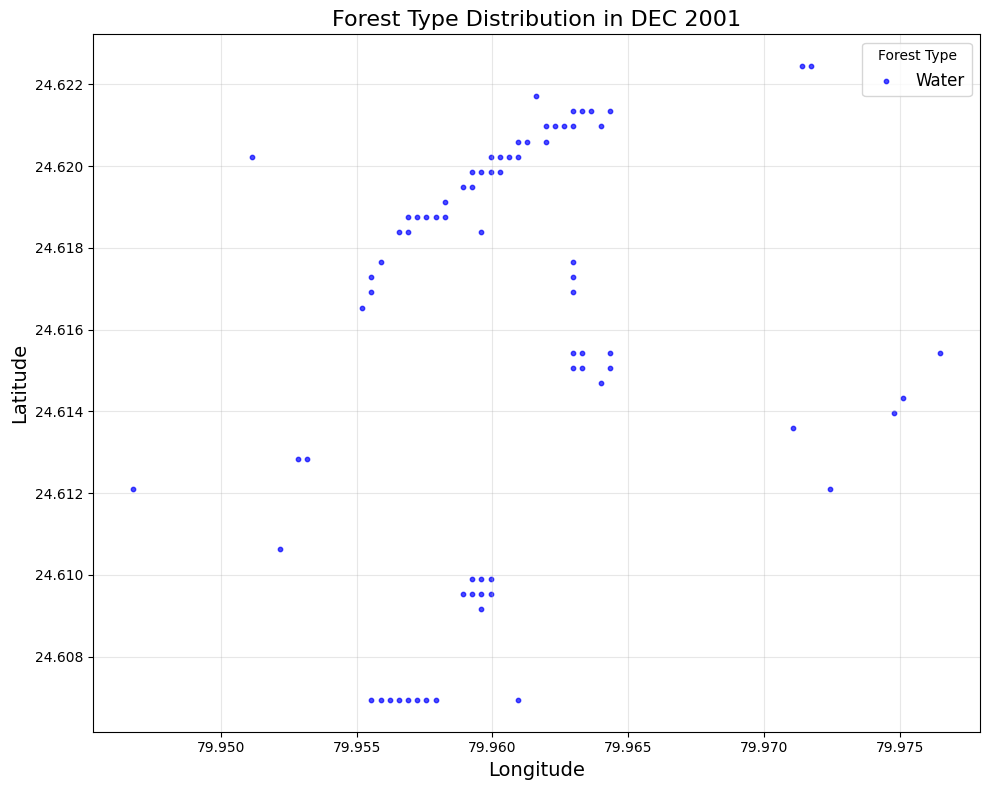

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure the 'month' column is properly ordered
month_order = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN",
               "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
df = pd.read_csv("/content/dynamic_water_modified_forest_data.csv")
# Filter data for the year 2001 and sort months
# Create a copy of the filtered DataFrame
year_2001_data = df[df["year"] == 2001].copy()

# Safely update the "month" column with ordered categories
year_2001_data["month"] = pd.Categorical(year_2001_data["month"], categories=month_order, ordered=True)

# Sort the data by the "month" column
year_2001_data = year_2001_data.sort_values("month")

# Define forest type colors
forest_type_colors = {
    "Water": "blue"
}


# Plot scatter plots for each month
for month in month_order:
    month_data = year_2001_data[year_2001_data["month"] == month]
    plt.figure(figsize=(10, 8))

    # Plot each forest type separately
    for forest_type, color in forest_type_colors.items():
        forest_data = month_data[month_data["forest_type"] == forest_type]
        plt.scatter(
            forest_data["longitude"],
            forest_data["latitude"],
            label=forest_type,
            color=color,
            alpha=0.7,
            s=10
        )

    # Add plot details
    plt.title(f"Forest Type Distribution in {month} 2001", fontsize=16)
    plt.xlabel("Longitude", fontsize=14)
    plt.ylabel("Latitude", fontsize=14)
    plt.legend(title="Forest Type", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()



    # Show the plot (optional)
    plt.show()
    plt.close()


In [ ]:
len(df)

687072

<ipython-input-6-42d06faa682d>:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/dynamic_water_modified_forest_data.csv")


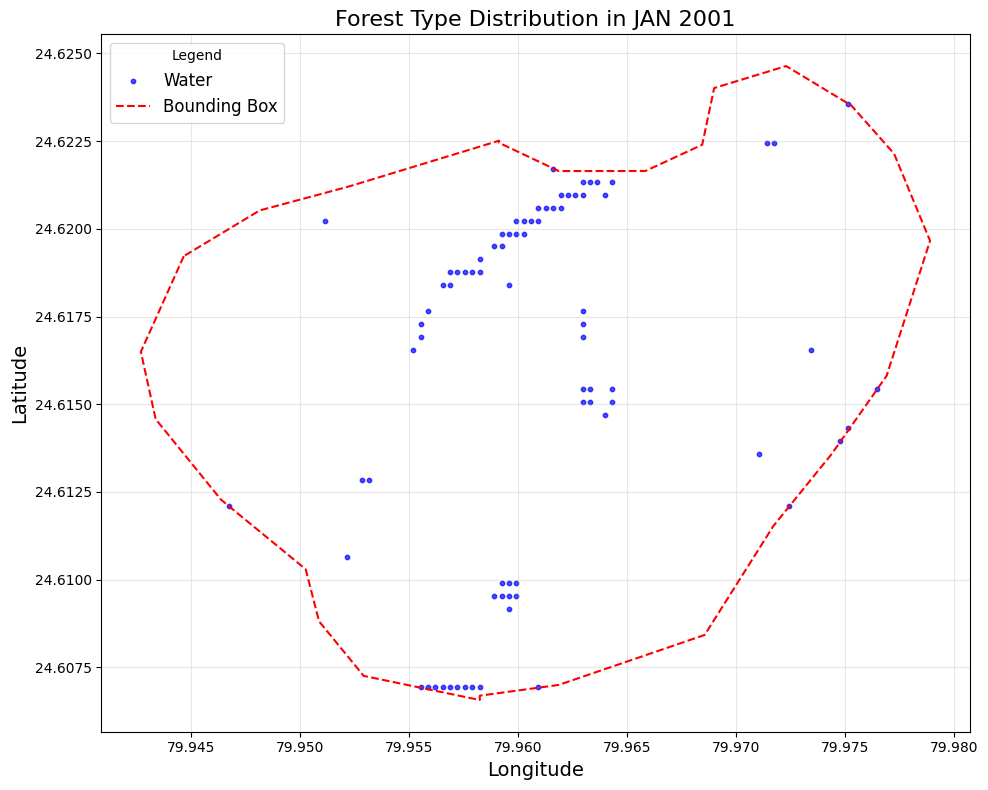

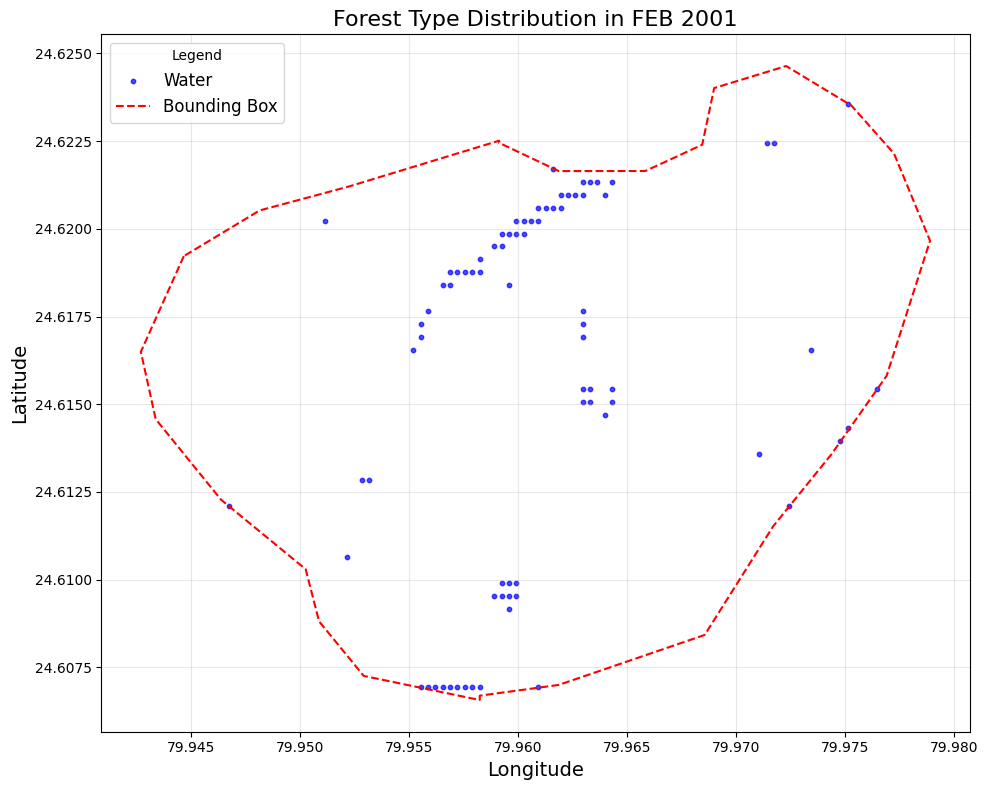

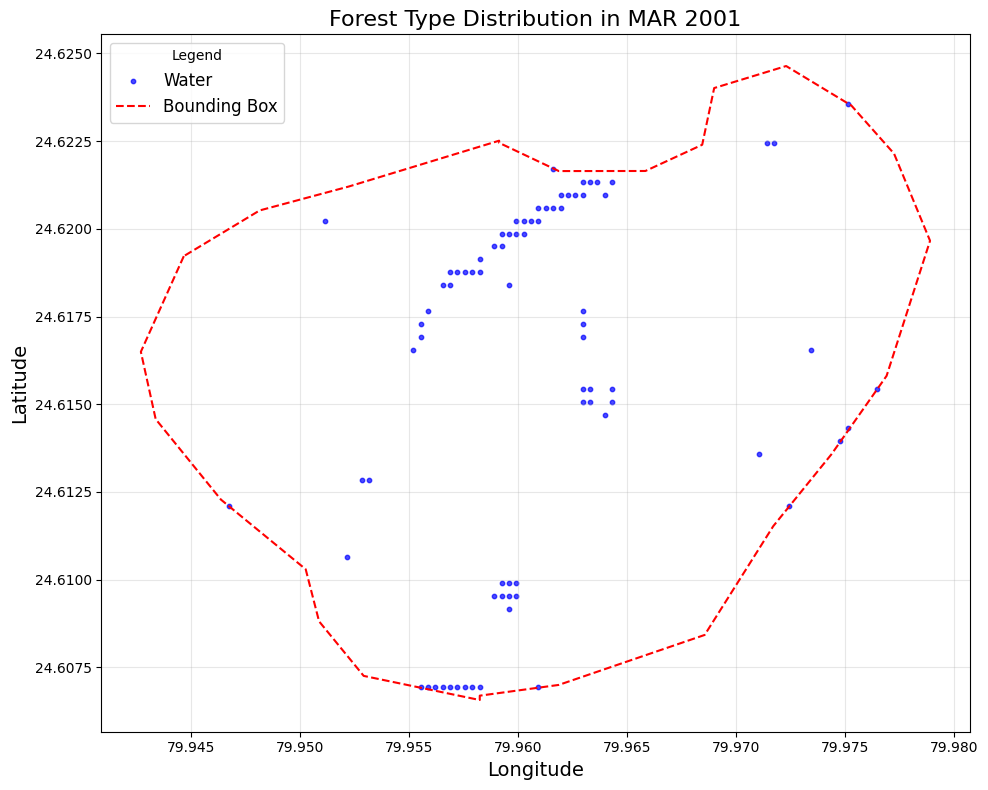

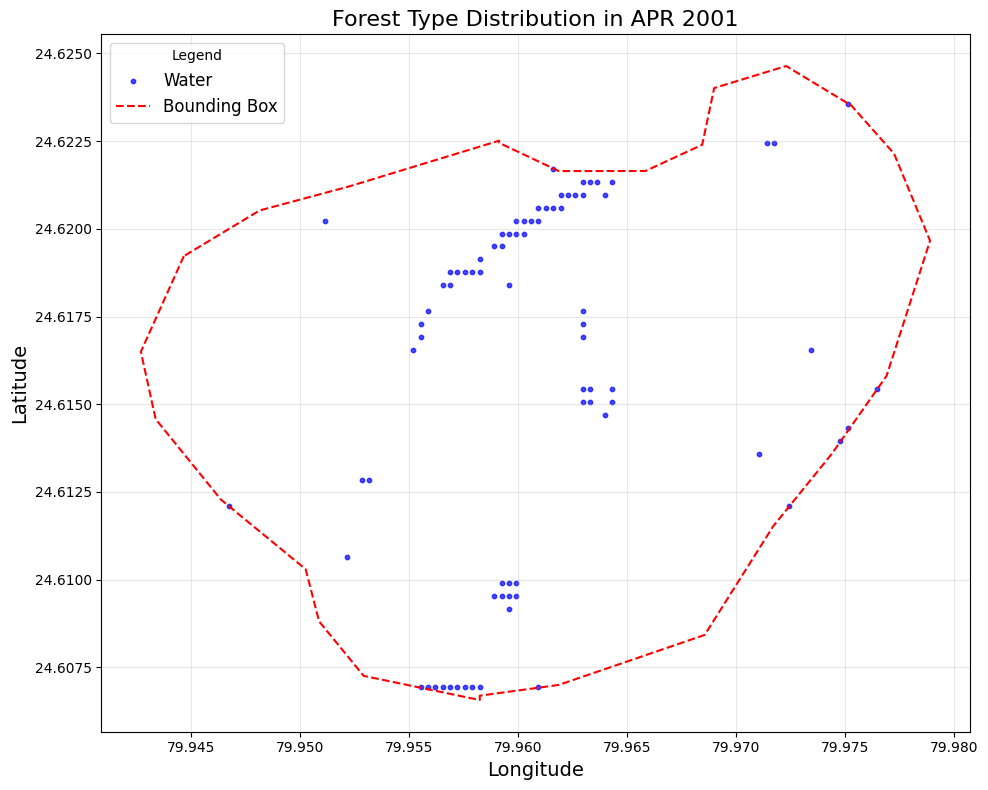

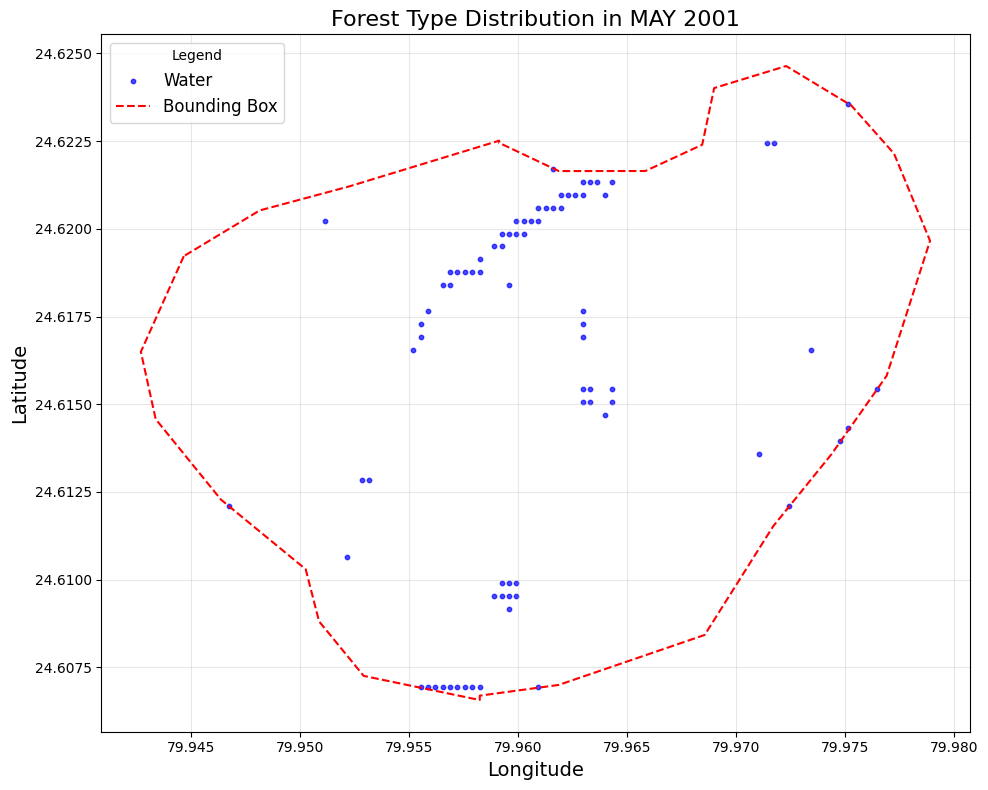

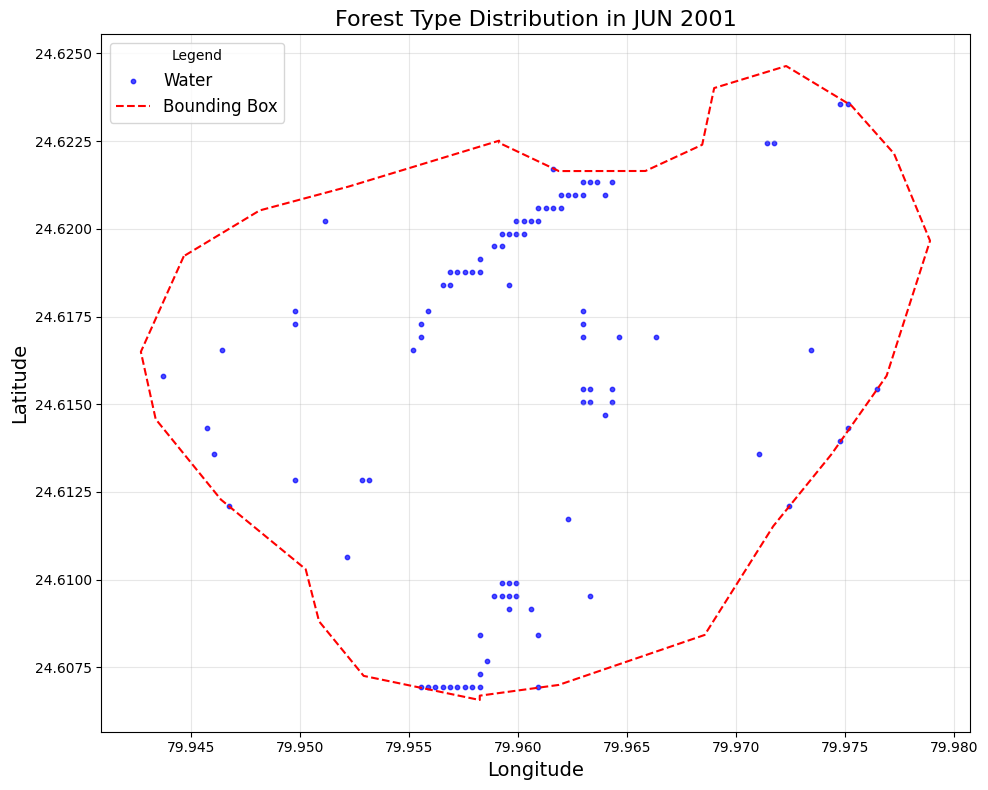

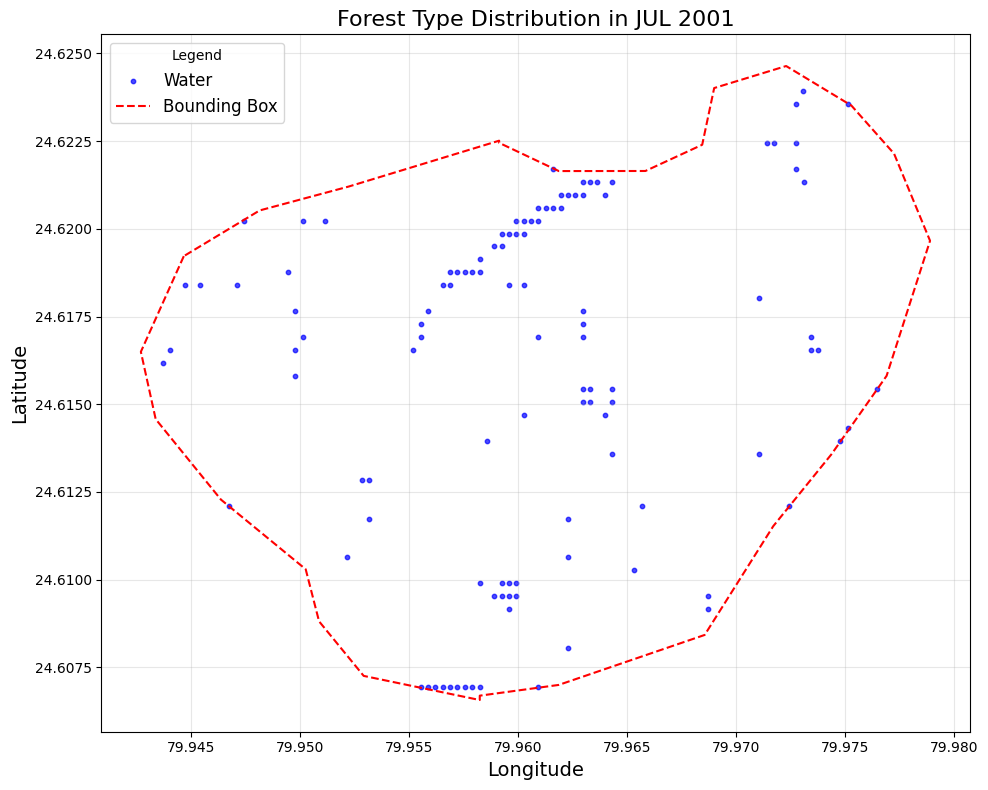

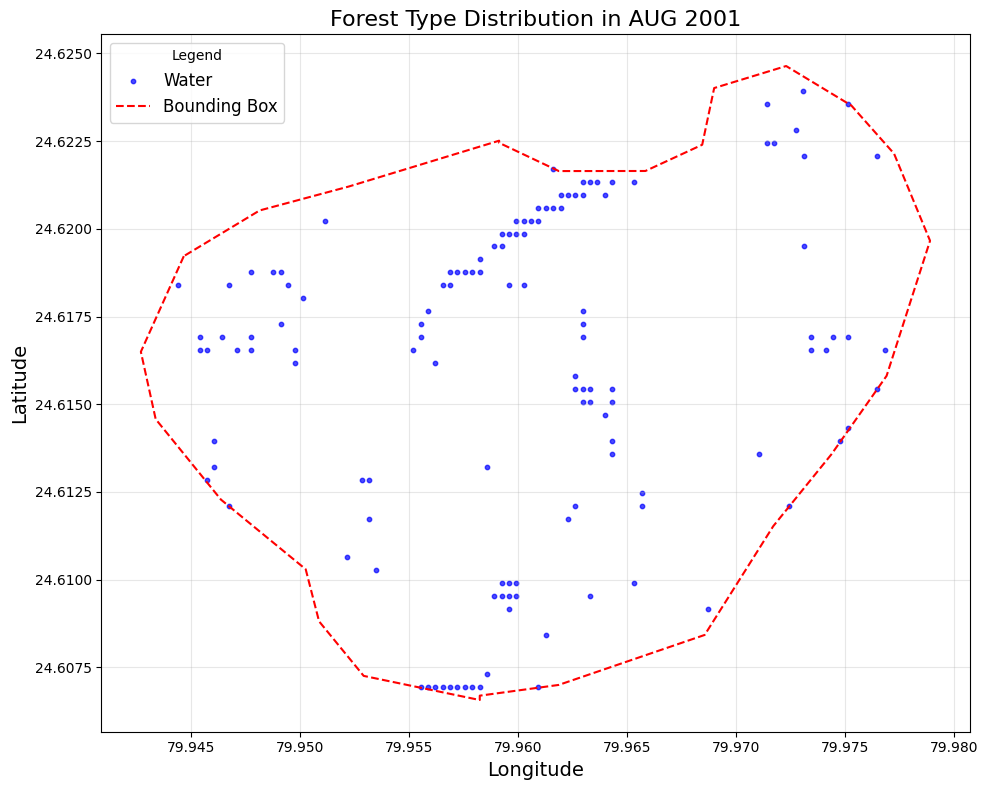

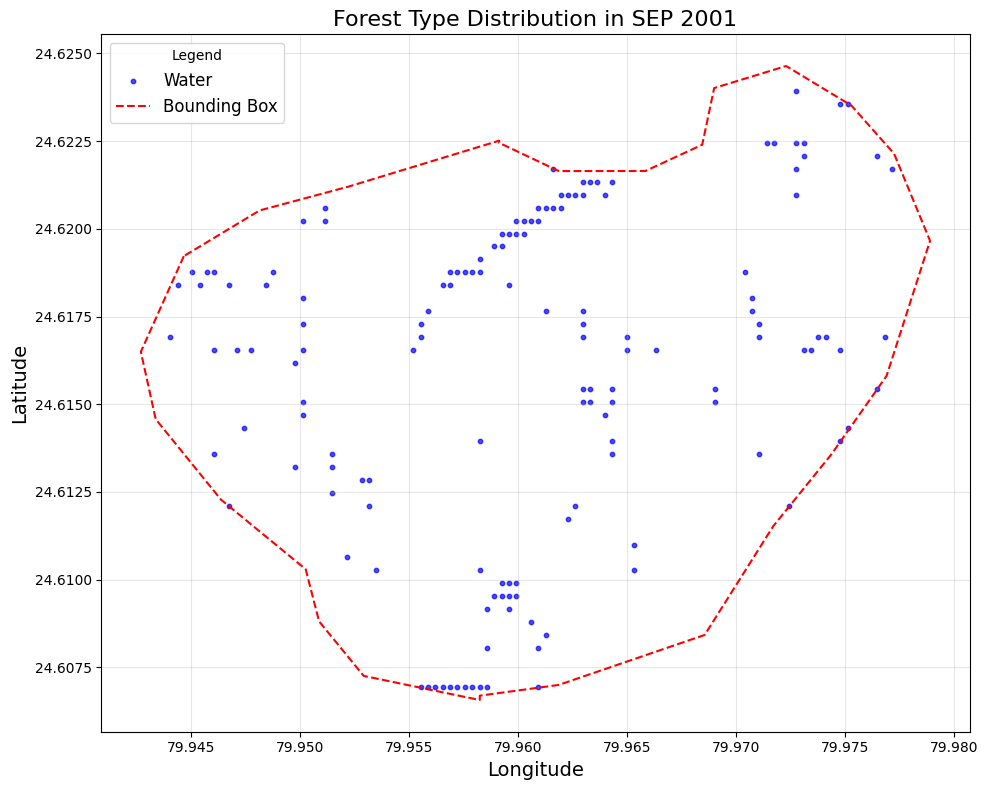

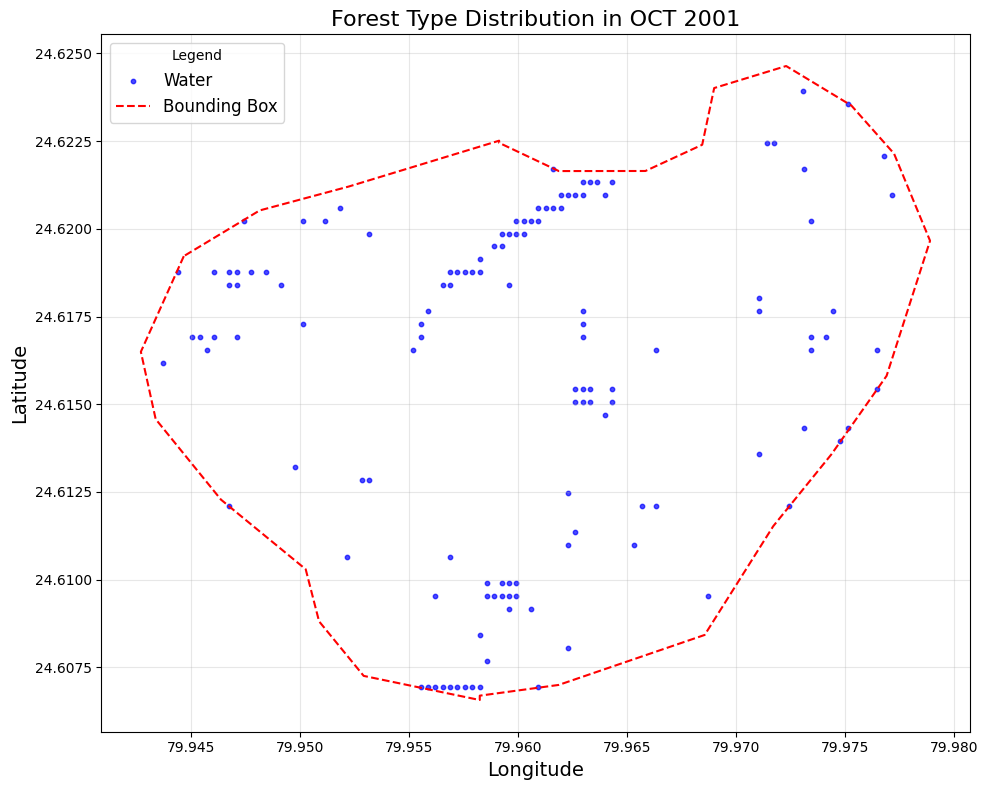

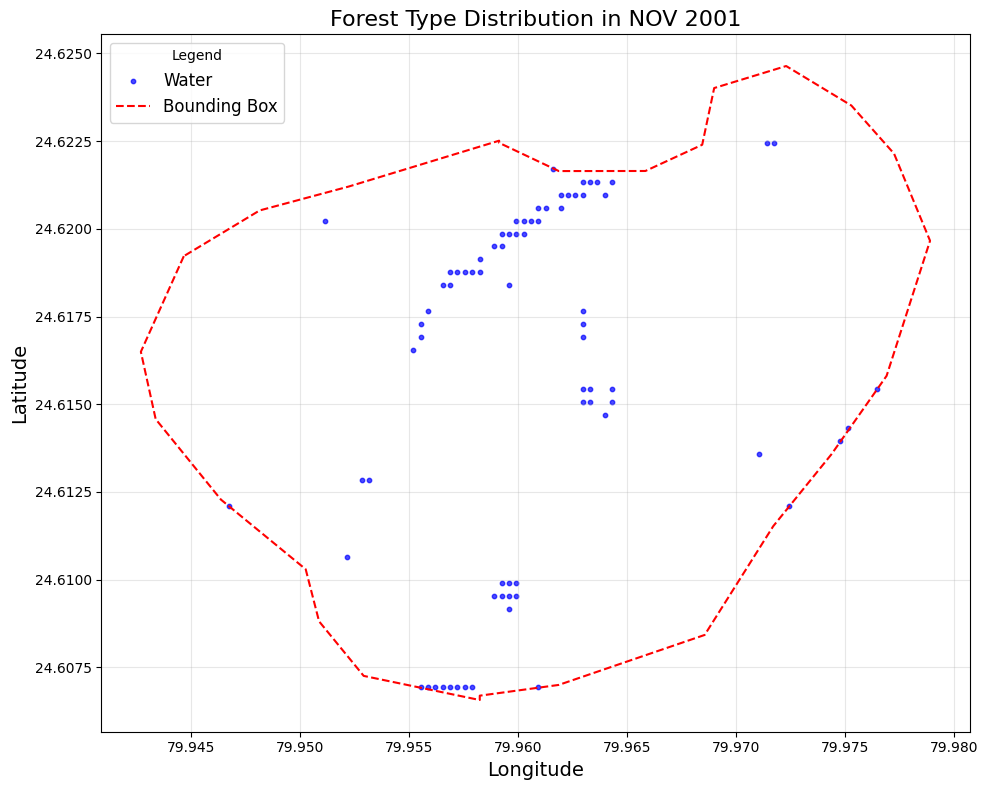

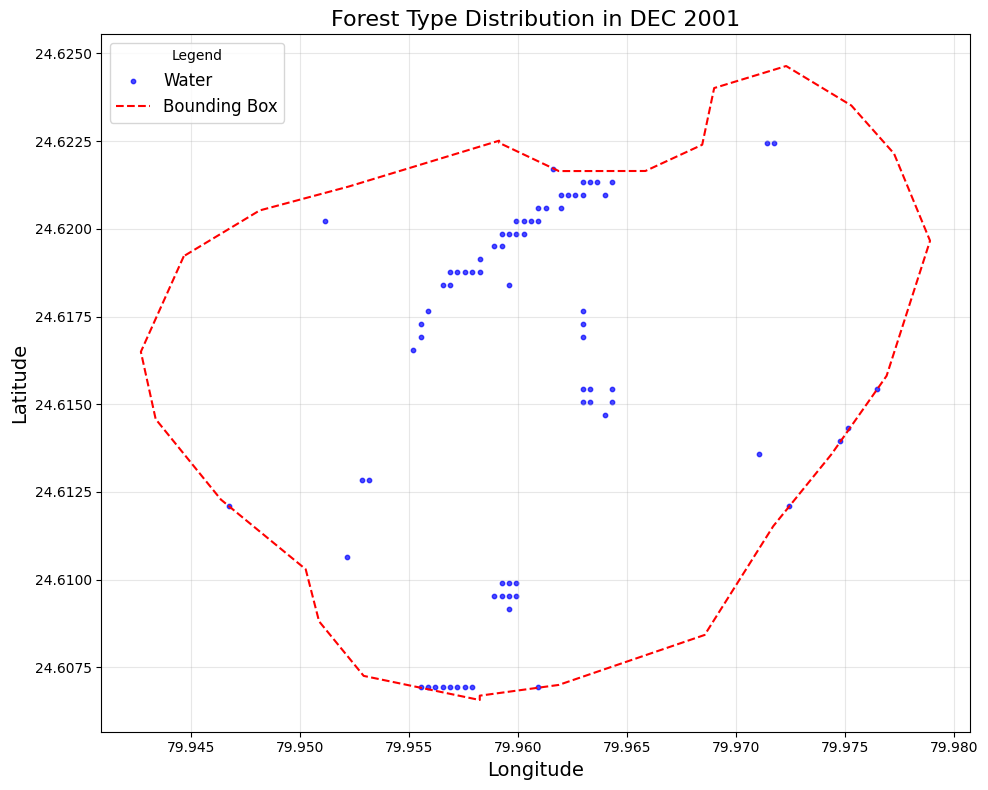

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'month' column is properly ordered
month_order = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN",
               "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

# Load your dataset
df = pd.read_csv("/content/dynamic_water_modified_forest_data.csv")

# Filter data for the year 2001 and sort months
year_2001_data = df[df["year"] == 2001].copy()
year_2001_data["month"] = pd.Categorical(year_2001_data["month"], categories=month_order, ordered=True)
year_2001_data = year_2001_data.sort_values("month")

# Define forest type colors
forest_type_colors = {
    "Water": "blue"
}

# Define bounding box coordinates
bounding_box = [
    (24.619220023961386, 79.94468841841837),
    (24.61649485328929, 79.94271953513679),
    (24.614575904458537, 79.94339881414824),
    (24.61228241126299, 79.94639200718441),
    (24.610298657532, 79.95027566620982),
    (24.60881443524366, 79.95088874297181),
    (24.60726019913875, 79.95293412913196),
    (24.606572658511087, 79.9582553604233),
    (24.60669667877494, 79.95825536527397),
    (24.607002731909347, 79.96187451577414),
    (24.608426693570497, 79.96856557561885),
    (24.61152732237915, 79.97171057257866),
    (24.613574343971173, 79.97437766514028),
    (24.615808527401757, 79.97690490392651),
    (24.61965787171238, 79.97889752020046),
    (24.62214006002244, 79.97724776443728),
    (24.623511930413187, 79.97529033761457),
    (24.62463679368871, 79.97230075751973),
    (24.6240094687391, 79.96900155936194),
    (24.62239368365942, 79.96845269828208),
    (24.621646261181464, 79.96584836365336),
    (24.621643906484902, 79.96188020626808),
    (24.622447822744178, 79.95914497845294),
    (24.622509947771366, 79.95914515096338),
    (24.621203988647977, 79.95225248718403),
    (24.62052173681583, 79.94816292431844),
    (24.619220023961386, 79.94468841841837)
]

# Separate the bounding box into latitude and longitude
bounding_lat, bounding_lon = zip(*bounding_box)

# Plot scatter plots for each month
for month in month_order:
    month_data = year_2001_data[year_2001_data["month"] == month]
    plt.figure(figsize=(10, 8))

    # Plot each forest type separately
    for forest_type, color in forest_type_colors.items():
        forest_data = month_data[month_data["forest_type"] == forest_type]
        plt.scatter(
            forest_data["longitude"],
            forest_data["latitude"],
            label=forest_type,
            color=color,
            alpha=0.7,
            s=10
        )

    # Plot the bounding box
    plt.plot(bounding_lon, bounding_lat, color='red', linestyle='--', linewidth=1.5, label="Bounding Box")

    # Add plot details
    plt.title(f"Forest Type Distribution in {month} 2001", fontsize=16)
    plt.xlabel("Longitude", fontsize=14)
    plt.ylabel("Latitude", fontsize=14)
    plt.legend(title="Legend", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Show the plot
    plt.show()
    plt.close()
